## <center>**DETECTION OF AUTISTIC SPECTRUM DISORDER**

### **Importing libraries**

In [ ]:
#necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from sklearn.impute import SimpleImputer

### **Loading Dataset**

In [ ]:
#loading dataset
ad = pd.read_csv("/content/csv_result-Autism-Adolescent-Data.csv",na_values=['?'])
ch = pd.read_csv("/content/csv_result-Autism-Child-Data.csv",na_values=['?'])
adu = pd.read_csv("/content/csv_result-Autism-Adult-Data.csv",na_values=['?'])
td = pd.read_csv("/content/Toddler Autism dataset July 2018.csv")

### **Understanding the data**

Sample records

In [ ]:
#Toddler's
td.sample(2)

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
982,983,1,1,1,1,1,1,1,0,1,0,36,8,m,asian,no,no,family member,Yes
937,938,0,0,1,0,0,0,0,0,0,1,19,2,m,middle eastern,no,no,family member,No


In [ ]:
#Children
ch.sample(2)

,id,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
261,262,1,1,0,0,1,0,1,1,0,0,6.0,m,Asian,no,no,India,no,5,4-11 years,Parent,NO
5,6,0,0,1,0,1,1,0,1,0,1,4.0,m,NaN,no,yes,Egypt,no,5,4-11 years,NaN,NO


In [ ]:
#Adolescents
ad.sample(2)

,id,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
60,61,1,1,1,1,1,1,1,1,1,1,12,f,White-European,no,yes,United Kingdom,no,10,12-16 years,Self,YES
31,32,1,1,1,1,1,1,0,0,0,1,13,m,White-European,no,no,United Kingdom,no,7,12-16 years,Self,YES


In [ ]:
#Adults
adu.sample(2)

,id,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
316,317,0,1,0,0,0,0,1,1,0,1,24.0,f,Middle Eastern,no,no,United Arab Emirates,no,4,18 and more,Self,NO
15,16,1,1,0,1,1,0,0,1,0,1,18.0,m,Middle Eastern,no,yes,New Zealand,no,6,18 and more,Parent,NO


Number of tuples and fields

In [ ]:
print("Toddlers    :",td.shape)
print("Children    :",ch.shape)
print("Adolescents :",ad.shape)
print("Adults      :",adu.shape)

Toddlers    : (1054, 19)
Children    : (292, 22)
Adolescents : (104, 22)
Adults      : (704, 22)


Information of all fields



In [ ]:
#Toddlers
td.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Case_No                 1054 non-null   int64 
 1   A1                      1054 non-null   int64 
 2   A2                      1054 non-null   int64 
 3   A3                      1054 non-null   int64 
 4   A4                      1054 non-null   int64 
 5   A5                      1054 non-null   int64 
 6   A6                      1054 non-null   int64 
 7   A7                      1054 non-null   int64 
 8   A8                      1054 non-null   int64 
 9   A9                      1054 non-null   int64 
 10  A10                     1054 non-null   int64 
 11  Age_Mons                1054 non-null   int64 
 12  Qchat-10-Score          1054 non-null   int64 
 13  Sex                     1054 non-null   object
 14  Ethnicity               1054 non-null   object
 15  Jaun

In [ ]:
#children
ch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               292 non-null    int64  
 1   A1_Score         292 non-null    int64  
 2   A2_Score         292 non-null    int64  
 3   A3_Score         292 non-null    int64  
 4   A4_Score         292 non-null    int64  
 5   A5_Score         292 non-null    int64  
 6   A6_Score         292 non-null    int64  
 7   A7_Score         292 non-null    int64  
 8   A8_Score         292 non-null    int64  
 9   A9_Score         292 non-null    int64  
 10  A10_Score        292 non-null    int64  
 11  age              288 non-null    float64
 12  gender           292 non-null    object 
 13  ethnicity        249 non-null    object 
 14  jundice          292 non-null    object 
 15  austim           292 non-null    object 
 16  contry_of_res    292 non-null    object 
 17  used_app_before 

In [ ]:
#Adolescents
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               104 non-null    int64 
 1   A1_Score         104 non-null    int64 
 2   A2_Score         104 non-null    int64 
 3   A3_Score         104 non-null    int64 
 4   A4_Score         104 non-null    int64 
 5   A5_Score         104 non-null    int64 
 6   A6_Score         104 non-null    int64 
 7   A7_Score         104 non-null    int64 
 8   A8_Score         104 non-null    int64 
 9   A9_Score         104 non-null    int64 
 10  A10_Score        104 non-null    int64 
 11  age              104 non-null    int64 
 12  gender           104 non-null    object
 13  ethnicity        98 non-null     object
 14  jundice          104 non-null    object
 15  austim           104 non-null    object
 16  contry_of_res    104 non-null    object
 17  used_app_before  104 non-null    ob

In [ ]:
#Adults
adu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               704 non-null    int64  
 1   A1_Score         704 non-null    int64  
 2   A2_Score         704 non-null    int64  
 3   A3_Score         704 non-null    int64  
 4   A4_Score         704 non-null    int64  
 5   A5_Score         704 non-null    int64  
 6   A6_Score         704 non-null    int64  
 7   A7_Score         704 non-null    int64  
 8   A8_Score         704 non-null    int64  
 9   A9_Score         704 non-null    int64  
 10  A10_Score        704 non-null    int64  
 11  age              702 non-null    float64
 12  gender           704 non-null    object 
 13  ethnicity        609 non-null    object 
 14  jundice          704 non-null    object 
 15  austim           704 non-null    object 
 16  contry_of_res    704 non-null    object 
 17  used_app_before 

Data description

In [ ]:
#Toddlers
td.describe()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score
count,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000
mean,527.500000,0.563567,0.448767,0.401328,0.512334,0.524668,0.576850,0.649905,0.459203,0.489564,0.586338,27.867173,5.212524
std,304.407895,0.496178,0.497604,0.490400,0.500085,0.499628,0.494293,0.477226,0.498569,0.500128,0.492723,7.980354,2.907304
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000
25%,264.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.000000,3.000000
50%,527.500000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,30.000000,5.000000
75%,790.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,36.000000,8.000000
max,1054.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,36.000000,10.000000


In [ ]:
#Children
ch.describe()

,id,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result
count,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,288.000000,292.000000
mean,146.500000,0.633562,0.534247,0.743151,0.551370,0.743151,0.712329,0.606164,0.496575,0.493151,0.726027,6.354167,6.239726
std,84.437354,0.482658,0.499682,0.437646,0.498208,0.437646,0.453454,0.489438,0.500847,0.500811,0.446761,2.365456,2.284882
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000
25%,73.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,5.000000
50%,146.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,6.000000,6.000000
75%,219.250000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,8.000000
max,292.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11.000000,10.000000


In [ ]:
#Adolescents
ad.describe()

,id,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result
count,104.000000,104.000000,104.000000,104.000000,104.000000,104.00000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000
mean,52.500000,0.730769,0.538462,0.653846,0.701923,0.75000,0.769231,0.519231,0.615385,0.788462,0.653846,14.134615,6.721154
std,30.166206,0.445708,0.500933,0.478047,0.459629,0.43511,0.423365,0.502050,0.488860,0.410377,0.478047,1.576882,2.200868
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,1.000000
25%,26.750000,0.000000,0.000000,0.000000,0.000000,0.75000,1.000000,0.000000,0.000000,1.000000,0.000000,13.000000,6.000000
50%,52.500000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,14.000000,7.000000
75%,78.250000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,16.000000,8.000000
max,104.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,16.000000,10.000000


In [ ]:
#Adults
adu.describe()

,id,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result
count,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,702.000000,704.000000
mean,352.500000,0.721591,0.453125,0.457386,0.495739,0.498580,0.284091,0.417614,0.649148,0.323864,0.573864,29.698006,4.875000
std,203.371581,0.448535,0.498152,0.498535,0.500337,0.500353,0.451301,0.493516,0.477576,0.468281,0.494866,16.507465,2.501493
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000
25%,176.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,3.000000
50%,352.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,27.000000,4.000000
75%,528.250000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.000000,7.000000
max,704.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,383.000000,10.000000


Total number of missing values in each dataset

In [ ]:
print("Total no. of missing values in Toddler's dataset    : ",td.isnull().sum().sum())
print("Total no. of missing values in Children's dataset   : ",ch.isnull().sum().sum())
print("Total no. of missing values in Adolescent's dataset : ",ad.isnull().sum().sum())
print("Total no. of missing values in Adults's dataset     : ",adu.isnull().sum().sum())

Total no. of missing values in Toddler's dataset    :  0
Total no. of missing values in Children's dataset   :  90
Total no. of missing values in Adolescent's dataset :  12
Total no. of missing values in Adults's dataset     :  192


Number of null values in each column

In [ ]:
#Toddlers
td.isnull().sum()

Case_No                   0
A1                        0
A2                        0
A3                        0
A4                        0
A5                        0
A6                        0
A7                        0
A8                        0
A9                        0
A10                       0
Age_Mons                  0
Qchat-10-Score            0
Sex                       0
Ethnicity                 0
Jaundice                  0
Family_mem_with_ASD       0
Who completed the test    0
Class/ASD Traits          0
dtype: int64

In [ ]:
#Children
ch.isnull().sum()

id                  0
A1_Score            0
A2_Score            0
A3_Score            0
A4_Score            0
A5_Score            0
A6_Score            0
A7_Score            0
A8_Score            0
A9_Score            0
A10_Score           0
age                 4
gender              0
ethnicity          43
jundice             0
austim              0
contry_of_res       0
used_app_before     0
result              0
age_desc            0
relation           43
Class/ASD           0
dtype: int64

In [ ]:
#Adolescents
ad.isnull().sum()

id                 0
A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                0
gender             0
ethnicity          6
jundice            0
austim             0
contry_of_res      0
used_app_before    0
result             0
age_desc           0
relation           6
Class/ASD          0
dtype: int64

In [ ]:
#Adults
adu.isnull().sum()

id                  0
A1_Score            0
A2_Score            0
A3_Score            0
A4_Score            0
A5_Score            0
A6_Score            0
A7_Score            0
A8_Score            0
A9_Score            0
A10_Score           0
age                 2
gender              0
ethnicity          95
jundice             0
austim              0
contry_of_res       0
used_app_before     0
result              0
age_desc            0
relation           95
Class/ASD           0
dtype: int64

### **Exploratory Data Analysis**

Heatmap showing missing values in each column

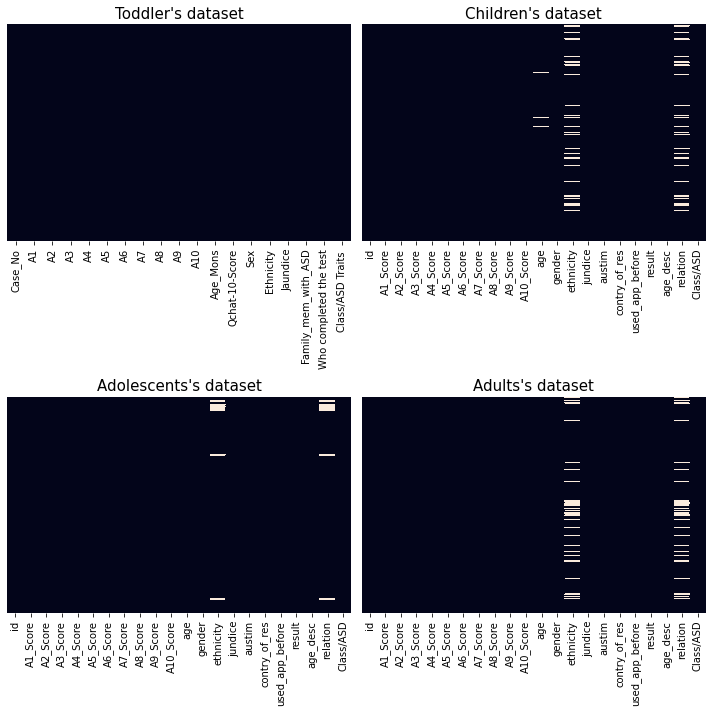

In [ ]:
fig, ax = plt.subplots(2,2,figsize=(10,10))
sns.heatmap(td.isnull(),yticklabels=False,cbar=False,cmap='rocket',ax=ax[0,0])
ax[0,0].set_title("Toddler's dataset",fontsize = 15)
sns.heatmap(ch.isnull(),yticklabels=False,cbar=False,cmap='rocket',ax=ax[0,1])
ax[0,1].set_title("Children's dataset",fontsize = 15)
sns.heatmap(ad.isnull(),yticklabels=False,cbar=False,cmap='rocket',ax=ax[1,0])
ax[1,0].set_title("Adolescents's dataset",fontsize = 15)
sns.heatmap(adu.isnull(),yticklabels=False,cbar=False,cmap='rocket',ax=ax[1,1])
ax[1,1].set_title("Adults's dataset",fontsize = 15)
fig.tight_layout()

ASD count

In [ ]:
print("No of toddlers diagonised with ASD = ",len(td[td['Class/ASD Traits '] == 'Yes']))
print("No of atoddlers not diagonised with ASD = ",len(td[td['Class/ASD Traits '] == 'No']))
print("\nNo of children diagonised with ASD = ",len(ch[ch['Class/ASD'] == 'YES']))
print("No of children not diagonised with ASD = ",len(ch[ch['Class/ASD'] == 'NO']))
print("\nNo of adolescents diagonised with ASD = ",len(ad[ad['Class/ASD'] == 'YES']))
print("No of adolescents not diagonised with ASD = ",len(ad[ad['Class/ASD'] == 'NO']))
print("\nNo of adults diagonised with ASD = ",len(adu[adu['Class/ASD'] == 'YES']))
print("No of adults not diagonised with ASD = ",len(adu[adu['Class/ASD'] == 'NO']))

No of toddlers diagonised with ASD =  728
No of atoddlers not diagonised with ASD =  326

No of children diagonised with ASD =  141
No of children not diagonised with ASD =  151

No of adolescents diagonised with ASD =  63
No of adolescents not diagonised with ASD =  41

No of adults diagonised with ASD =  189
No of adults not diagonised with ASD =  515


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass t

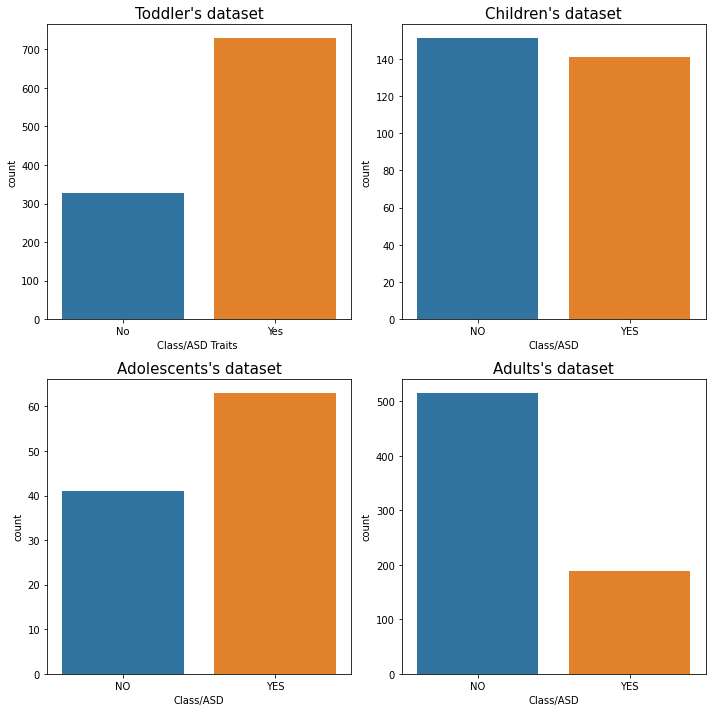

In [ ]:
fig, ax = plt.subplots(2,2,figsize=(10,10))
sns.countplot(td['Class/ASD Traits '],ax=ax[0,0])
sns.countplot(ch['Class/ASD'],ax=ax[0,1])
sns.countplot(ad['Class/ASD'],ax=ax[1,0])
sns.countplot(adu['Class/ASD'],ax=ax[1,1])
ax[0,0].set_title("Toddler's dataset",fontsize = 15)
ax[0,1].set_title("Children's dataset",fontsize = 15)
ax[1,0].set_title("Adolescents's dataset",fontsize = 15)
ax[1,1].set_title("Adults's dataset",fontsize = 15)
fig.tight_layout()

Correlaion

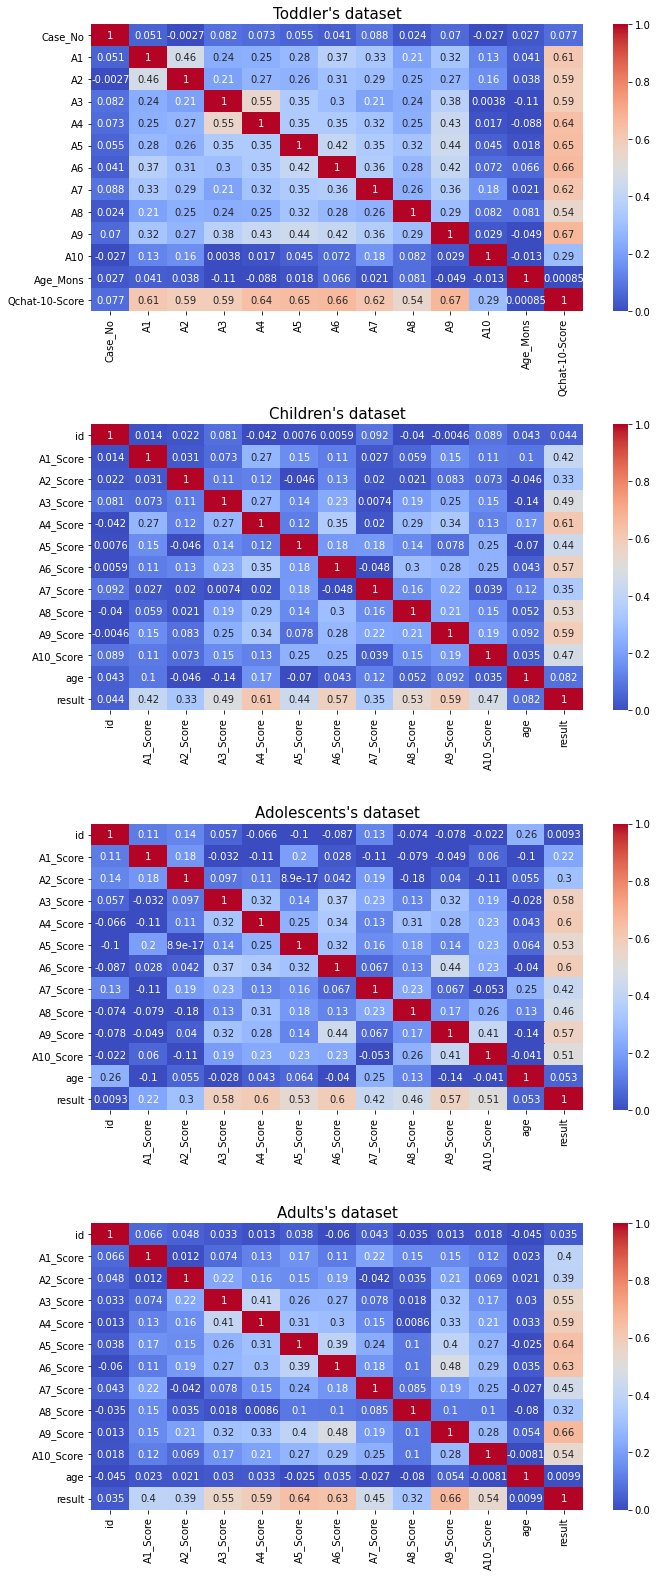

In [ ]:
fig, ax = plt.subplots(4,1,figsize=(10,22))
sns.heatmap(td.corr(),annot=True,cmap='coolwarm',vmin=0, vmax=1,ax=ax[0])
sns.heatmap(ch.corr(),annot=True,cmap='coolwarm',vmin=0, vmax=1,ax=ax[1])
sns.heatmap(ad.corr(),annot=True,cmap='coolwarm',vmin=0, vmax=1,ax=ax[2])
sns.heatmap(adu.corr(),annot=True,cmap='coolwarm',vmin=0, vmax=1,ax=ax[3])

ax[0].set_title("Toddler's dataset",fontsize = 15)
ax[1].set_title("Children's dataset",fontsize = 15)
ax[2].set_title("Adolescents's dataset",fontsize = 15)
ax[3].set_title("Adults's dataset",fontsize = 15)

fig.tight_layout()

Age distribution of ASD positive over gender

In [ ]:
fig = px.histogram(td[td['Class/ASD Traits '] == 'Yes'], x="Age_Mons", color="Sex")
fig.update_layout(
    autosize=False,
    width=500,
    height=500,
    title = "Age distribution of ASD positive toddlers over gender"
    )
fig.update_traces(marker_line_width=1)
fig.show()

In [ ]:
fig = px.histogram(ch[ch['Class/ASD'] == 'YES'], x="age", color="gender")
fig.update_layout(
    autosize=False,
    width=500,
    height=500,
    title = "Age distribution of ASD positive children over gender"
    )
fig.update_traces(marker_line_width=1)
fig.show()

In [ ]:
fig = px.histogram(ad[ad['Class/ASD'] == 'YES'], x="age", color="gender")
fig.update_layout(
    autosize=False,
    width=500,
    height=500,
    title = "Age distribution of ASD positive adolescents over gender"
    )
fig.update_traces(marker_line_width=1)
fig.show()

In [ ]:
fig = px.histogram(adu[adu['Class/ASD'] == 'YES'], x="age", color="gender")
fig.update_layout(
    autosize=False,
    width=500,
    height=500,
    title = "Age distribution of ASD positive adults over gender"
    )
fig.update_traces(marker_line_width=1)
fig.show()

Country wise distribution of ASD postive individuals

In [ ]:
td_yes = td[td['Class/ASD Traits '] == 'Yes']
ch_yes = ch[ch['Class/ASD'] == 'YES']
ad_yes = ad[ad['Class/ASD'] == 'YES']
adu_yes = adu[adu['Class/ASD'] == 'YES']

In [ ]:
labels2 = ad_yes['contry_of_res'].unique().tolist()
values2 = ad_yes['contry_of_res'].value_counts().tolist()
labels1 = ch_yes['contry_of_res'].unique().tolist()
values1 = ch_yes['contry_of_res'].value_counts().tolist()
labels3 = adu_yes['contry_of_res'].unique().tolist()
values3 = adu_yes['contry_of_res'].value_counts().tolist()
fig = make_subplots(rows=1, cols=3,subplot_titles=("Children", "Adolescents","Adults"), specs=[[{'type':'domain'}, {'type':'domain'},{'type':'domain'}]])

fig.add_trace(go.Pie(labels=labels1, values=values1, name="Children"),1, 1)
fig.add_trace(go.Pie(labels=labels2, values=values2, name="Adolescents"),1, 2)
fig.add_trace(go.Pie(labels=labels3, values=values3, name="Adults"),1, 3)
fig.update_traces(hole=.4, hoverinfo="label+percent+name")
fig.update_layout(margin=dict(t=0, b=0, l=0, r=0))
fig.show()

ASD postive individuals in top 10 countries

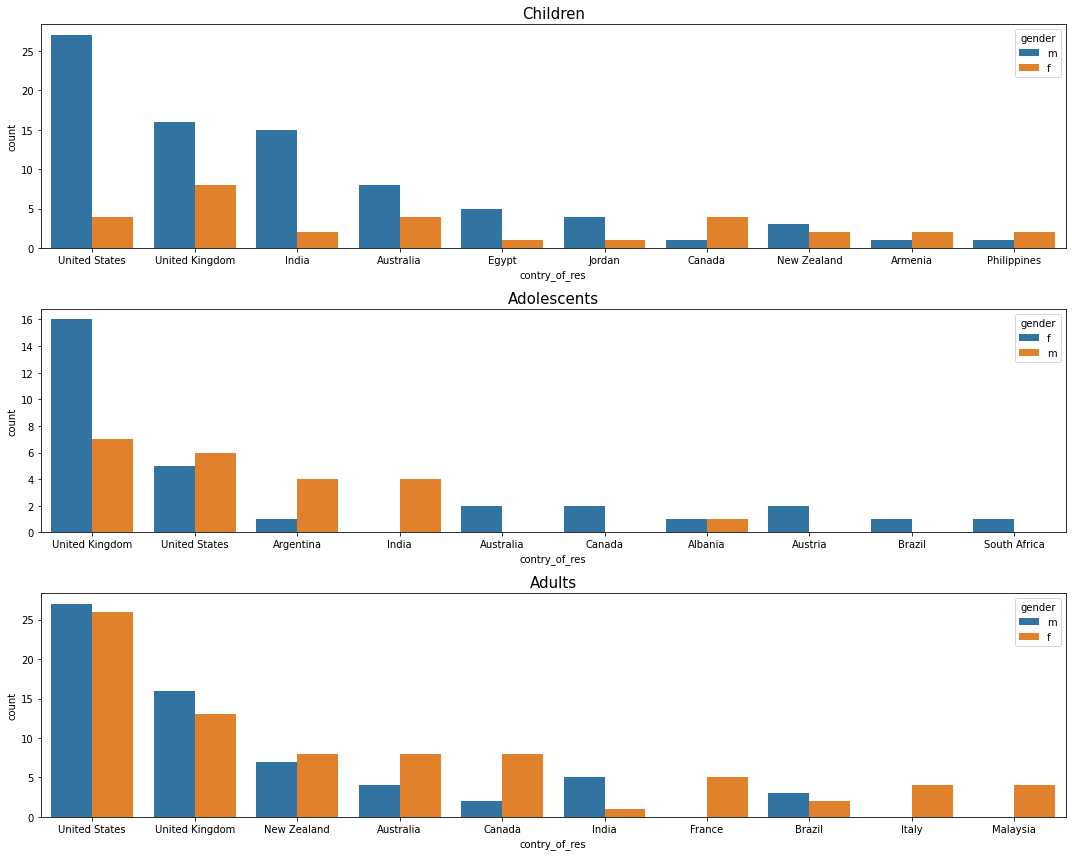

In [ ]:
fig, ax = plt.subplots(3,1,figsize=(15,12))
sns.countplot(x='contry_of_res',data=ch_yes,order= ch_yes['contry_of_res'].value_counts().index[:10],hue='gender',ax=ax[0])
ax[0].set_title("Children",fontsize = 15)

sns.countplot(x='contry_of_res',data=ad_yes,order= ad_yes['contry_of_res'].value_counts().index[:10],hue='gender',ax=ax[1])
ax[1].set_title('Adolescents',fontsize = 15)

sns.countplot(x='contry_of_res',data=adu_yes,order= adu_yes['contry_of_res'].value_counts().index[:10],hue='gender',ax=ax[2])
ax[2].set_title('Adults',fontsize = 15)

plt.tight_layout()

Distribution of ASD positive and ASD neagative individuals based on Country and gender


In [ ]:
fig = px.treemap(ch, path=['contry_of_res','gender','Class/ASD'])
fig.show()

In [ ]:
fig = px.treemap(ad, path=['contry_of_res','gender','Class/ASD'])
fig.show()

In [ ]:
fig = px.treemap(adu, path=['contry_of_res','gender','Class/ASD'])
fig.show()

Relation between Jaundice born individuals and ASD positive individuals

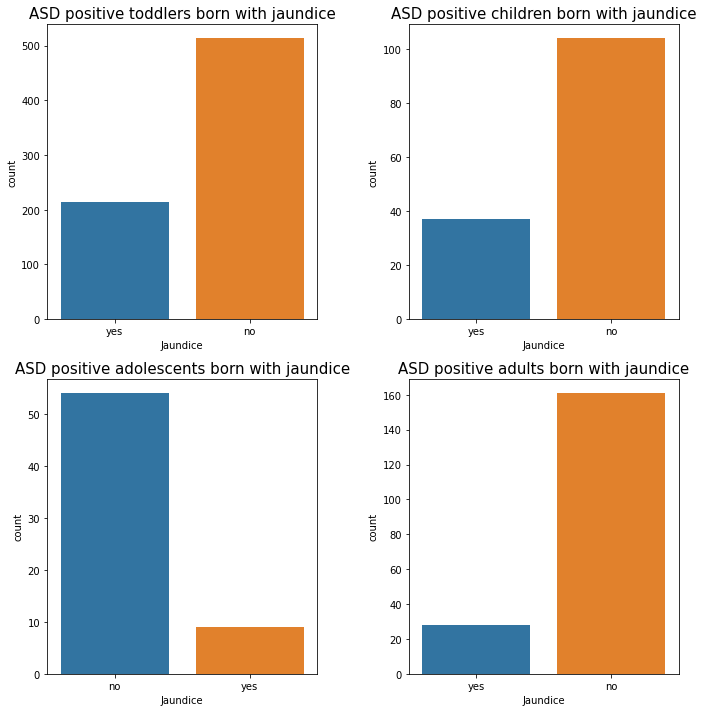

In [ ]:
fig, ax = plt.subplots(2,2,figsize=(10,10))
sns.countplot(x='Jaundice',data=td[td['Class/ASD Traits '] == 'Yes'],ax=ax[0,0])
ax[0,0].set_title('ASD positive toddlers born with jaundice', fontsize=15)
sns.countplot(x='jundice',data=ch[ch['Class/ASD'] == 'YES'],ax=ax[0,1])
ax[0,1].set_title('ASD positive children born with jaundice', fontsize=15)
sns.countplot(x='jundice',data=ad[ad['Class/ASD'] == 'YES'],ax=ax[1,0])
ax[1,0].set_title('ASD positive adolescents born with jaundice', fontsize=15)
sns.countplot(x='jundice',data=adu[adu['Class/ASD'] == 'YES'],ax=ax[1,1])
ax[1,1].set_title('ASD positive adults born with jaundice', fontsize=15)
ax[0,0].set_xlabel('Jaundice')
ax[0,1].set_xlabel('Jaundice')
ax[1,0].set_xlabel('Jaundice')
ax[1,1].set_xlabel('Jaundice')
fig.tight_layout()

Count of ethnicity on ASD postive individuals

In [ ]:
print("\tToddlers\n",td_yes['Ethnicity'].value_counts())
print("\n\tChildren\n",ch_yes['ethnicity'].value_counts())
print("\n\tAdolescents\n",ad_yes['ethnicity'].value_counts())
print("\n\tAdults\n",adu_yes['ethnicity'].value_counts())

	Toddlers
 White European    250
asian             212
middle eastern     96
black              39
south asian        37
Hispanic           30
Others             29
Latino             20
Pacifica            7
mixed               5
Native Indian       3
Name: Ethnicity, dtype: int64

	Children
 White-European     62
Asian              22
Black               9
South Asian         8
Middle Eastern      8
Hispanic            6
Others              5
Latino              5
Pasifika            1
Name: ethnicity, dtype: int64

	Adolescents
 White-European     30
Others             10
Asian               8
Black               4
Middle Eastern      4
Latino              3
Hispanic            2
South Asian         1
Name: ethnicity, dtype: int64

	Adults
 White-European     109
Black               18
Asian               16
Latino              10
Others               9
Middle Eastern       8
Hispanic             5
South Asian          3
Turkish              1
Pasifika             1
Name: ethnicity,

Distribution based on ethnicity and gender

Text(0.5, 1.0, 'Adults')

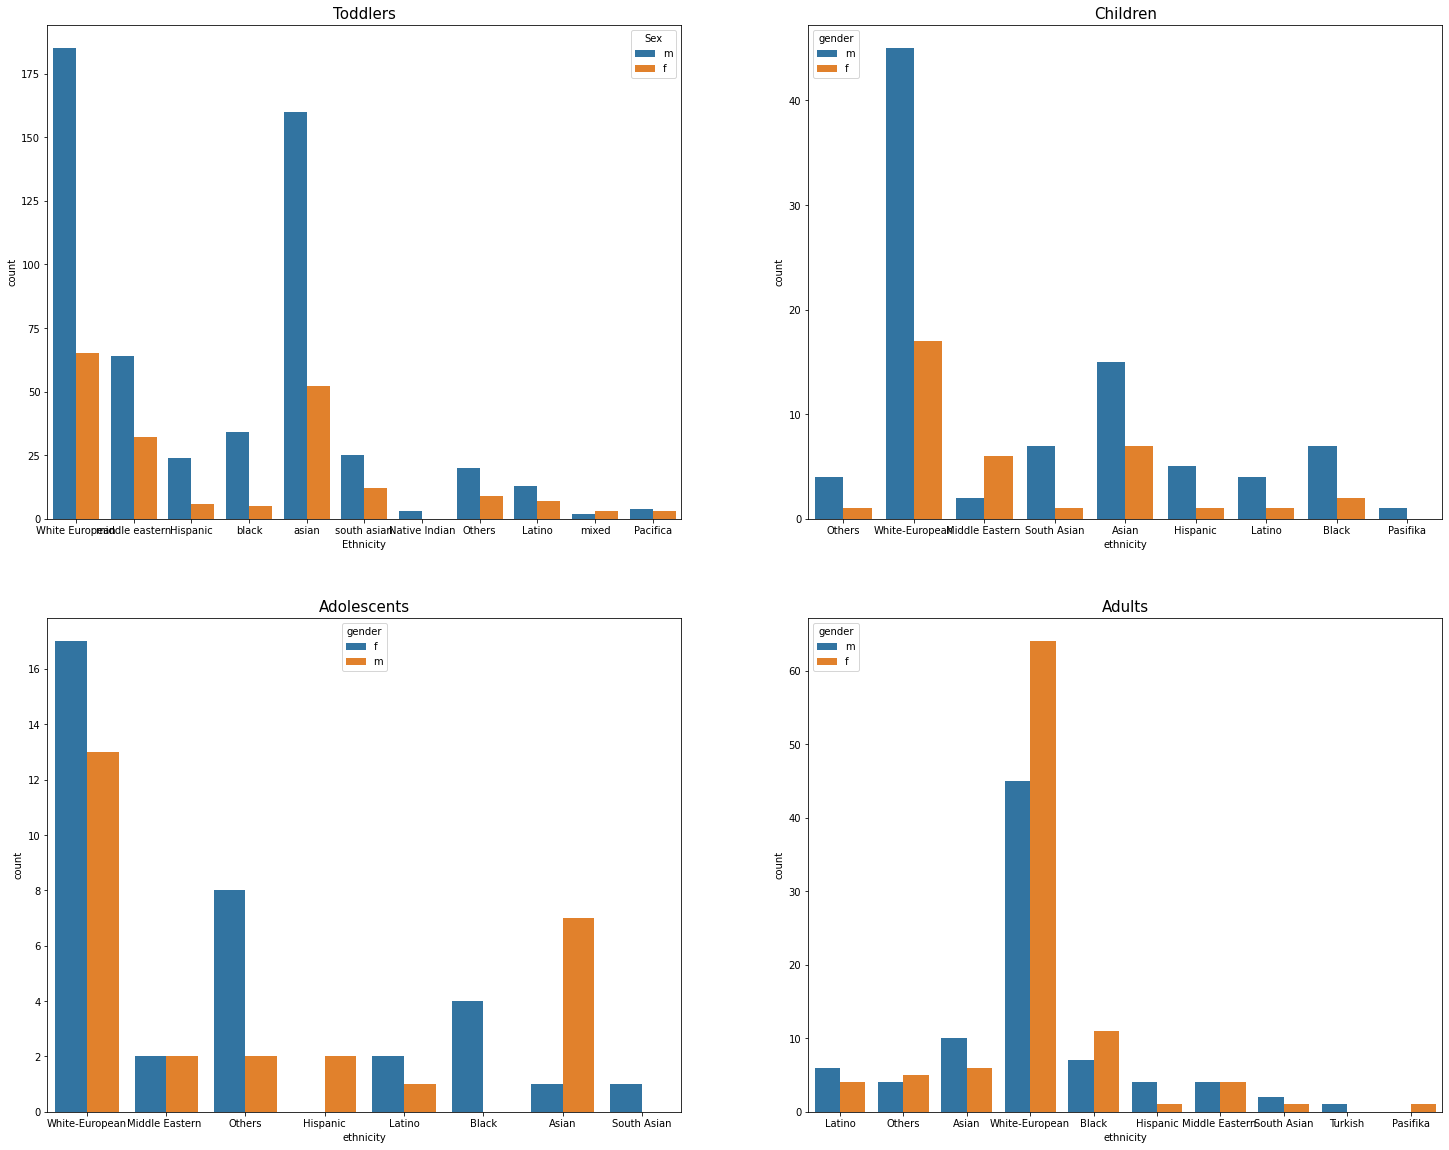

In [ ]:
fig, ax = plt.subplots(2,2,figsize=(25,20))
sns.countplot(x='Ethnicity',hue='Sex',data=td_yes,ax=ax[0,0])
sns.countplot(x='ethnicity',hue='gender',data=ch_yes,ax=ax[0,1])
sns.countplot(x='ethnicity',hue='gender',data=ad_yes,ax=ax[1,0])
sns.countplot(x='ethnicity',hue='gender',data=adu_yes,ax=ax[1,1])
ax[0,0].set_title('Toddlers',fontsize = 15)
ax[0,1].set_title('Children',fontsize = 15)
ax[1,0].set_title('Adolescents',fontsize = 15)
ax[1,1].set_title('Adults',fontsize = 15)

### **Data Preprocessing**

#### **Data Cleaning**

Removing unwanted columns

In [ ]:
ch.drop(columns=['age_desc'],axis = 1,inplace=True)
ad.drop(columns=['age_desc'],axis = 1,inplace=True)
adu.drop(columns=['age_desc'],axis = 1,inplace=True)

Imputing missing values

In [ ]:
#Number of missing values in each dataset
print("No of missing values in Toddler's dataset     = ",td.isnull().sum().sum())
print("No of missing values in Children's dataset    = ",ch.isnull().sum().sum())
print("No of missing values in Adolescents's dataset = ",ad.isnull().sum().sum())
print("No of missing values in Adults's dataset      = ",adu.isnull().sum().sum())

No of missing values in Toddler's dataset     =  0
No of missing values in Children's dataset    =  90
No of missing values in Adolescents's dataset =  12
No of missing values in Adults's dataset      =  192


In [ ]:
#Imputing missing values of categorical features with mode
imputer_mode = SimpleImputer(missing_values=np.NaN, strategy='most_frequent')

ch.age = imputer_mode.fit_transform(ch.age.values.reshape(-1,1))[:,0]
ch.ethnicity = imputer_mode.fit_transform(ch.ethnicity.values.reshape(-1,1))[:,0]
ch.relation = imputer_mode.fit_transform(ch.relation.values.reshape(-1,1))[:,0]

ad.ethnicity = imputer_mode.fit_transform(ad.ethnicity.values.reshape(-1,1))[:,0]
ad.relation = imputer_mode.fit_transform(ad.relation.values.reshape(-1,1))[:,0]

adu.ethnicity = imputer_mode.fit_transform(adu.ethnicity.values.reshape(-1,1))[:,0]
adu.relation = imputer_mode.fit_transform(adu.relation.values.reshape(-1,1))[:,0]


#Imputing missing values of numerical features with mean
imputer_mode = SimpleImputer(missing_values=np.NaN, strategy='mean')

ch.age = imputer_mode.fit_transform(ch.age.values.reshape(-1,1))[:,0]
adu.age = imputer_mode.fit_transform(adu.age.values.reshape(-1,1))[:,0]

In [ ]:
print("After imputing,\nNo of missing values in Toddler's dataset     = ",td.isnull().sum().sum())
print("No of missing values in Children's dataset    = ",ch.isnull().sum().sum())
print("No of missing values in Adolescents's dataset = ",ad.isnull().sum().sum())
print("No of missing values in Adults's dataset      = ",adu.isnull().sum().sum())

After imputing,
No of missing values in Toddler's dataset     =  0
No of missing values in Children's dataset    =  0
No of missing values in Adolescents's dataset =  0
No of missing values in Adults's dataset      =  0


In [ ]:
#Since age of toddlers are represented in months, age(in years) of children, adolescents and adults is converted to age in months.
ad.rename(columns = {'age':'Age_Mons'}, inplace = True)
ch.rename(columns = {'age':'Age_Mons'}, inplace = True)
adu.rename(columns = {'age':'Age_Mons'}, inplace = True)

ad['Age_Mons'] = ad['Age_Mons']*12
ch['Age_Mons'] = ch['Age_Mons']*12
adu['Age_Mons'] = adu['Age_Mons']*12

In [ ]:
#Making field names of toddler's dataset same as that of other three datasets
td.rename(columns = {'Case_No':'id', 
                     'A1':'A1_Score',
                     'A2':'A2_Score',
                     'A3':'A3_Score',
                     'A4':'A4_Score',
                     'A5':'A5_Score',
                     'A6':'A6_Score', 
                     'A7':'A7_Score', 
                     'A8':'A8_Score',
                     'A9':'A9_Score',
                     'A10':'A10_Score', 
                     'Sex':'gender',
                     'Ethnicity':'ethnicity',
                     'Jaundice':'jundice', 
                     'Family_mem_with_ASD':'austim',
                     'Who completed the test':'relation',
                     'Class/ASD Traits ':'Class/ASD',
                     'Qchat-10-Score':'result'}, inplace = True)

In [ ]:
#Making classes of categorical variables same for all datasets
td['Class/ASD'] = td['Class/ASD'].replace(['Yes','No'],['YES','NO'])
td['jundice'] = td['jundice'].replace(['Yes','No'],['YES','NO'])
td['austim'] = td['austim'].replace(['Yes','No'],['YES','NO'])


td['ethnicity'] = td['ethnicity'].replace(['middle eastern', 'White European', 'black', 'asian','south asian','Pacifica'],
                                          ['Middle Eastern ','White-European','Black','Asian','South Asian','Pasifika'])
adu['ethnicity'] = adu['ethnicity'].replace('Others','others')


td['relation'] = td['relation'].replace(['family member','Health Care Professional','Health care professional'],
                                        ['Relative','Health care professional','Health care professional'])
ch["relation"] = ch["relation"].replace('self','Self')

### **Model fitting**

#### Toddler's dataset

*Spliting dependent and independent features*


In [ ]:
# Split the data into features and target label
raw_target= td['Class/ASD']
raw_features = td[['A1_Score','A2_Score','A3_Score','A4_Score','A5_Score','A6_Score','A7_Score','A8_Score','A9_Score','A10_Score','Age_Mons', 'gender', 'ethnicity', 'jundice', 'austim', 'result','relation']]


*Random Down-Sampling*

In [ ]:
shuffled_data = td.sample(frac=1,random_state=4)
ASD_data = shuffled_data.loc[shuffled_data['Class/ASD'] == 'YES']
non_ASD_data = shuffled_data.loc[shuffled_data['Class/ASD'] == 'NO'].sample(n=326)
td= pd.concat([ASD_data, non_ASD_data])

*Feature Scaling*

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
num_features = ['Age_Mons', 'result']

features_minmax_transform = pd.DataFrame(data = raw_features)
features_minmax_transform[num_features] = scaler.fit_transform(raw_features[num_features])

In [ ]:
features_minmax_transform.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,Age_Mons,gender,ethnicity,jundice,austim,result,relation
0,0,0,0,0,0,0,1,1,0,1,0.666667,f,Middle Eastern,yes,no,0.3,Relative
1,1,1,0,0,0,1,1,0,0,0,1.000000,m,White-European,yes,no,0.4,Relative
2,1,0,0,0,0,0,1,1,0,1,1.000000,m,Middle Eastern,yes,no,0.4,Relative
3,1,1,1,1,1,1,1,1,1,1,0.500000,m,Hispanic,no,no,1.0,Relative
4,1,1,0,1,1,1,1,1,1,1,0.333333,f,White-European,no,yes,0.9,Relative


*Encoding Categorical variables*

In [ ]:
features = pd.get_dummies(features_minmax_transform)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
target = le.fit_transform(raw_target)

*Function for Evaluation*

In [ ]:
def model_report(y_act, y_pred):
    from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, cohen_kappa_score, roc_curve,auc
    print("Accuracy = ", accuracy_score(y_act, y_pred))
    print("Precision = " ,precision_score(y_act, y_pred))
    print("Recall = " ,recall_score(y_act, y_pred))
    print("F1 Score = " ,f1_score(y_act, y_pred))
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_act, y_pred)
    print("AUC Score =", auc(false_positive_rate, true_positive_rate))
    print("Kappa score = ",cohen_kappa_score(y_act,y_pred))
    print("Error rate = " ,1 - accuracy_score(y_act, y_pred),"\n")
    pass

*Spliting Data*

In [ ]:
X_td = features
y_td = target

*Function for models*

In [ ]:
def models(X,y):
    #Splitting the data into train test spit
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 50)

    #Importing Time for calculating the training and testing time
    import time
    start_time = time.time()
    
    #importing Gaussian Naive Bayes
    from sklearn.naive_bayes import GaussianNB
    gnb = GaussianNB()
    gnb.fit(X_train, y_train)
    
    # Predicting the Test set results
    y_pred = gnb.predict(X_test)
    
    #Getting the predicting probability
    predict_probab = gnb.predict_proba(X_test)
    
    #Geting the log_loss value of the model
    from sklearn.metrics import log_loss
    logloss = log_loss(y_test, predict_probab)
    end_time = time.time()
    eta = end_time - start_time
    
    #10-fold cross validation score
    from sklearn.model_selection import cross_val_score
    accuracy_gausian = cross_val_score(estimator = gnb, X = X_train, y = y_train, cv =10)
    gnb_mean = accuracy_gausian.mean()
    print("10 Fold Cross Validation Score Of Gaussian Naive Bayes:", gnb_mean)
    print('Time Elapsed:', eta)
    print('Log Loss:', logloss)
    
    #printing the output using the model report function
    model_report(y_test, y_pred)
    #
    #
    #
    start_time = time.time()
    #importing Multinomial Naive Bayes
    from sklearn.naive_bayes import MultinomialNB
    mnb = MultinomialNB()
    mnb.fit(X_train, y_train)
    
    #Getting the predicting probability
    predict_probab = mnb.predict_proba(X_test)
    
    #Geting the log_loss value of the model
    logloss = log_loss(y_test, predict_probab)
    
    # Predicting the Test set results
    y_pred = mnb.predict(X_test)
    end_time = time.time()
    eta = end_time - start_time
    
    #10-fold cross validation score
    accuracy_gausian = cross_val_score(estimator = mnb, X = X_train, y = y_train, cv =10)
    mnb_mean = accuracy_gausian.mean()
    print("10 Fold Cross Validation Score Of Multinomial Navie Bayes:", mnb_mean)
    print('Time Elapsed:', eta)
    print('log loss:', logloss)
    
    #printing the output using the model report function
    model_report(y_test, y_pred)
    #
    #
    #
    start_time = time.time()
    #importing Random Forest
    from sklearn.ensemble import RandomForestClassifier
    rf = RandomForestClassifier()
    rf.fit(X_train, y_train)
    # Predicting the Test set results
    y_pred = rf.predict(X_test)
    end_time = time.time()
    eta = end_time - start_time
    
    #10-fold cross validation score
    accuracy = cross_val_score(estimator = rf, X = X_train, y = y_train, cv =2)
    rf_cross = accuracy.mean()
    print("10-Fold Cross  Validation Score of Random Forest(Without Paramter Tuning):", rf_cross)
    print('Time Elapsed:', eta)

    #printing the output using the model report function
    model_report(y_test, y_pred)
    #
    #
    #
    start_time = time.time()
    #importing Random Forest
    from sklearn.ensemble import RandomForestClassifier
    rf = RandomForestClassifier(n_estimators = 800, min_samples_split = 5, min_samples_leaf = 1, max_features = 'sqrt', max_depth = 560, criterion = 'entropy')
    rf.fit(X_train, y_train)
    
    # Predicting the Test set results
    y_pred = rf.predict(X_test)
    end_time = time.time()
    eta = end_time - start_time
    
    #10-fold cross validation score
    from sklearn.model_selection import cross_val_score
    accuracy = cross_val_score(estimator = rf, X = X_train, y = y_train, cv =10)
    rf_cross = accuracy.mean()
    print("10-Fold Cross  Validation Score of Random Forest(With Paramter Tuning):", rf_cross)
    print('Time Elapsed:', eta)
    
    #printing the output using the model report function
    model_report(y_test, y_pred)
    
    #
    #
    #
    start_time = time.time()
    
    #importing support vector classifier
    from sklearn.svm import SVC

    svc = SVC()
    svc.fit(X_train,y_train)

    # Predicting the Test set results
    y_svc = svc.predict(X_test)
    end_time = time.time()
    eta = end_time - start_time
    
    #10-fold cross validation score
    from sklearn.model_selection import cross_val_score
    accuracy = cross_val_score(estimator = svc, X = X_train, y = y_train, cv =10)
    svc_mean = accuracy.mean()
    print("10 Fold Cross Validation Score Of Support Vector Classifier(Without parameter tuning):", svc_mean)
    print('Time Elapsed:', eta)

    #printing the output using the model report function
    model_report(y_test, y_svc)
    #
    #
    #
    start_time = time.time()
    
    #importing support vector classifier
    from sklearn.svm import SVC

    svc = SVC(kernel='poly',degree=2,C=1)
    svc.fit(X_train,y_train)

    # Predicting the Test set results
    y_svc = svc.predict(X_test)
    end_time = time.time()
    eta = end_time - start_time
    
    #10-fold cross validation score
    from sklearn.model_selection import cross_val_score
    accuracy = cross_val_score(estimator = svc, X = X_train, y = y_train, cv =10)
    svc_mean = accuracy.mean()
    print("10 Fold Cross Validation Score Of Support Vector Classifier(With parameter tuning):", svc_mean)
    print('Time Elapsed:', eta)

    #printing the output using the model report function
    model_report(y_test, y_svc)
    #
    #
    #
    start_time = time.time()
    
    #importing support vector classifier
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

    lda = LinearDiscriminantAnalysis()
    lda.fit(X_train,y_train)
    # Predicting the Test set results
    y_lda = svc.predict(X_test)
    end_time = time.time()
    eta = end_time - start_time
    
    #10-fold cross validation score
    from sklearn.model_selection import cross_val_score
    accuracy = cross_val_score(estimator = lda, X = X_train, y = y_train, cv =10)
    lda_mean = accuracy.mean()
    print("10 Fold Cross Validation Score Of Linear Discriminant Analysis:", lda_mean)
    print('Time Elapsed:', eta)

    #printing the output using the model report function
    model_report(y_test, y_lda)
    #
    #
    #
    start_time = time.time()
    from sklearn import neighbors

    knn = neighbors.KNeighborsClassifier()
    knn.fit(X_train,y_train)
    # Predicting the Test set results
    y_knn=knn.predict(X_test)
    end_time = time.time()
    eta = end_time - start_time
    
    #10-fold cross validation score
    from sklearn.model_selection import cross_val_score
    accuracy = cross_val_score(estimator = knn, X = X_train, y = y_train, cv =10)
    knn_mean = accuracy.mean()
    print("10 Fold Cross Validation Score Of K-Nearest Neighbour Algorithm(Without parameter tuning):", knn_mean)
    print('Time Elapsed:', eta)

    #printing the output using the model report function
    model_report(y_test, y_knn)
    #
    #
    #
    start_time = time.time()
    from sklearn import neighbors

    knn = neighbors.KNeighborsClassifier(weights='uniform', n_neighbors= 10, leaf_size=445, algorithm='brute')
    knn.fit(X_train,y_train)
    # Predicting the Test set results
    y_knn=knn.predict(X_test)
    end_time = time.time()
    eta = end_time - start_time
    
    #10-fold cross validation score
    from sklearn.model_selection import cross_val_score
    accuracy = cross_val_score(estimator = knn, X = X_train, y = y_train, cv =10)
    knn_mean = accuracy.mean()
    print("10 Fold Cross Validation Score Of K-Nearest Neighbour Algorithm(With parameter tuning):", knn_mean)
    print('Time Elapsed:', eta)

    #printing the output using the model report function
    model_report(y_test, y_knn)


In [ ]:
models(X_td,y_td) 

10 Fold Cross Validation Score Of Gaussian Naive Bayes: 0.7816106442577031
Time Elapsed: 0.009598016738891602
Log Loss: 2.0854033338473004
Accuracy =  0.7962085308056872
Precision =  1.0
Recall =  0.7034482758620689
F1 Score =  0.825910931174089
AUC Score = 0.8517241379310345
Kappa score =  0.5974175799795891
Error rate =  0.2037914691943128 

10 Fold Cross Validation Score Of Multinomial Navie Bayes: 0.9240616246498599
Time Elapsed: 0.007994890213012695
log loss: 0.2282864702375891
Accuracy =  0.8815165876777251
Precision =  0.879746835443038
Recall =  0.9586206896551724
F1 Score =  0.9174917491749175
AUC Score = 0.8353709508881924
Kappa score =  0.7087727046872412
Error rate =  0.11848341232227488 

10-Fold Cross  Validation Score of Random Forest(Without Paramter Tuning): 1.0
Time Elapsed: 0.21149778366088867
Accuracy =  1.0
Precision =  1.0
Recall =  1.0
F1 Score =  1.0
AUC Score = 1.0
Kappa score =  1.0
Error rate =  0.0 

10-Fold Cross  Validation Score of Random Forest(With Para

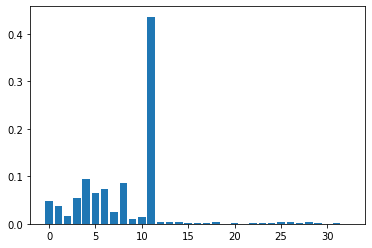

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_td, y_td, test_size = 0.20, random_state = 50)

from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2  
# 700 features with highest chi-squared statistics are selected 
chi2_features = SelectKBest(chi2,k=20)
X = chi2_features.fit_transform(X_td, y_td)
y = y_td

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=0)
model.fit(X_train, y_train)
# plot
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
plt.show()


In [ ]:
importance = pd.DataFrame(model.feature_importances_)
columns = pd.DataFrame(features.columns)
featureScores = pd.concat([columns,importance],axis=1)
featureScores.columns = ['Features','importance']
print(featureScores.nlargest(5,'importance')) 

    Features  importance
11    result    0.436334
4   A5_Score    0.095028
8   A9_Score    0.085192
6   A7_Score    0.073252
5   A6_Score    0.064617


#### Children's dataset

*Spliting dependent and independent features*


In [ ]:
# Split the data into features and target label
raw_target= ch['Class/ASD']
raw_features = ch[['A1_Score','A2_Score','A3_Score','A4_Score','A5_Score','A6_Score','A7_Score','A8_Score','A9_Score','A10_Score','Age_Mons', 'gender','contry_of_res', 'ethnicity', 'jundice', 'austim', 'contry_of_res', 'result','relation']]

*Feature Scaling*

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
num_features = ['Age_Mons', 'result']

features_minmax_transform = pd.DataFrame(data = raw_features)
features_minmax_transform[num_features] = scaler.fit_transform(raw_features[num_features])

In [ ]:
features_minmax_transform.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,Age_Mons,gender,contry_of_res,ethnicity,jundice,austim,contry_of_res,result,relation
0,1,1,0,0,1,1,0,1,0,0,0.285714,m,Jordan,Others,no,no,Jordan,0.5,Parent
1,1,1,0,0,1,1,0,1,0,0,0.285714,m,Jordan,Middle Eastern,no,no,Jordan,0.5,Parent
2,1,1,0,0,0,1,1,1,0,0,0.285714,m,Jordan,White-European,no,no,Jordan,0.5,Parent
3,0,1,0,0,1,1,0,0,0,1,0.142857,f,Jordan,White-European,yes,no,Jordan,0.4,Parent
4,1,1,1,1,1,1,1,1,1,1,0.142857,m,United States,Others,yes,no,United States,1.0,Parent


*Encoding Categorical variables*

In [ ]:
features = pd.get_dummies(features_minmax_transform)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
target = le.fit_transform(raw_target)

*Function for Evaluation*

In [ ]:
def model_report(y_act, y_pred):
    from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, cohen_kappa_score, roc_curve,auc
    print("Accuracy = ", accuracy_score(y_act, y_pred))
    print("Precision = " ,precision_score(y_act, y_pred))
    print("Recall = " ,recall_score(y_act, y_pred))
    print("F1 Score = " ,f1_score(y_act, y_pred))
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_act, y_pred)
    print("AUC Score =", auc(false_positive_rate, true_positive_rate))
    print("Kappa score = ",cohen_kappa_score(y_act,y_pred))
    print("Error rate = " ,1 - accuracy_score(y_act, y_pred),"\n")
    pass



*Spliting Data*


In [ ]:
X_ch = features
y_ch = target

*Function for Models*

In [ ]:
def models(X,y):
    #Splitting the data into train test spit
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X_ch, y_ch, test_size = 0.20, random_state = 50)

    #Importing Time for calculating the training and testing time
    import time
    start_time = time.time()
    
    #importing Gaussian Naive Bayes
    from sklearn.naive_bayes import GaussianNB
    gnb = GaussianNB()
    gnb.fit(X_train, y_train)
    
    # Predicting the Test set results
    y_pred = gnb.predict(X_test)
    
    #Getting the predicting probability
    predict_probab = gnb.predict_proba(X_test)
    
    #Geting the log_loss value of the model
    from sklearn.metrics import log_loss
    logloss = log_loss(y_test, predict_probab)
    end_time = time.time()
    eta = end_time - start_time
    
    #10-fold cross validation score
    from sklearn.model_selection import cross_val_score
    accuracy_gausian = cross_val_score(estimator = gnb, X = X_train, y = y_train, cv =10)
    gnb_mean = accuracy_gausian.mean()
    print("10 Fold Cross Validation Score Of Gaussian Naive Bayes:", gnb_mean)
    print('Time Elapsed:', eta)
    print('Log Loss:', logloss)
    
    #printing the output using the model report function
    model_report(y_test, y_pred)
    #
    #
    #
    start_time = time.time()
    #importing Multinomial Naive Bayes
    from sklearn.naive_bayes import MultinomialNB
    mnb = MultinomialNB()
    mnb.fit(X_train, y_train)
    
    #Getting the predicting probability
    predict_probab = mnb.predict_proba(X_test)
    
    #Geting the log_loss value of the model
    logloss = log_loss(y_test, predict_probab)
    
    # Predicting the Test set results
    y_pred = mnb.predict(X_test)
    end_time = time.time()
    eta = end_time - start_time
    
    #10-fold cross validation score
    accuracy_gausian = cross_val_score(estimator = mnb, X = X_train, y = y_train, cv =10)
    mnb_mean = accuracy_gausian.mean()
    print("10 Fold Cross Validation Score Of Multinomial Navie Bayes:", mnb_mean)
    print('Time Elapsed:', eta)
    print('log loss:', logloss)
    
    #printing the output using the model report function
    model_report(y_test, y_pred)
    #
    #
    #
    start_time = time.time()
    #importing Random Forest
    from sklearn.ensemble import RandomForestClassifier
    rf = RandomForestClassifier()
    rf.fit(X_train, y_train)
    # Predicting the Test set results
    y_pred = rf.predict(X_test)
    end_time = time.time()
    eta = end_time - start_time
    
    #10-fold cross validation score
    accuracy = cross_val_score(estimator = rf, X = X_train, y = y_train, cv =2)
    rf_cross = accuracy.mean()
    print("10-Fold Cross  Validation Score of Random Forest(Without Paramter Tuning):", rf_cross)
    print('Time Elapsed:', eta)

    #printing the output using the model report function
    model_report(y_test, y_pred)
    #
    #
    #
    start_time = time.time()
    #importing Random Forest
    from sklearn.ensemble import RandomForestClassifier
    rf = RandomForestClassifier(n_estimators = 800, min_samples_split = 5, min_samples_leaf = 1, max_features = 'sqrt', max_depth = 560, criterion = 'entropy')
    rf.fit(X_train, y_train)
    
    # Predicting the Test set results
    y_pred = rf.predict(X_test)
    end_time = time.time()
    eta = end_time - start_time
    
    #10-fold cross validation score
    from sklearn.model_selection import cross_val_score
    accuracy = cross_val_score(estimator = rf, X = X_train, y = y_train, cv =10)
    rf_cross = accuracy.mean()
    print("10-Fold Cross  Validation Score of Random Forest(With Paramter Tuning):", rf_cross)
    print('Time Elapsed:', eta)
    
    #printing the output using the model report function
    model_report(y_test, y_pred)
    
    #
    #
    #
    start_time = time.time()
    
    #importing support vector classifier
    from sklearn.svm import SVC

    svc = SVC()
    svc.fit(X_train,y_train)

    # Predicting the Test set results
    y_svc = svc.predict(X_test)
    end_time = time.time()
    eta = end_time - start_time
    
    #10-fold cross validation score
    from sklearn.model_selection import cross_val_score
    accuracy = cross_val_score(estimator = svc, X = X_train, y = y_train, cv =10)
    svc_mean = accuracy.mean()
    print("10 Fold Cross Validation Score Of Support Vector Classifier(Without parameter tuning):", svc_mean)
    print('Time Elapsed:', eta)

    #printing the output using the model report function
    model_report(y_test, y_svc)
    #
    #
    #
    start_time = time.time()
    
    #importing support vector classifier
    from sklearn.svm import SVC

    svc = SVC(kernel='poly',degree=2,C=1)
    svc.fit(X_train,y_train)

    # Predicting the Test set results
    y_svc = svc.predict(X_test)
    end_time = time.time()
    eta = end_time - start_time
    
    #10-fold cross validation score
    from sklearn.model_selection import cross_val_score
    accuracy = cross_val_score(estimator = svc, X = X_train, y = y_train, cv =10)
    svc_mean = accuracy.mean()
    print("10 Fold Cross Validation Score Of Support Vector Classifier(With parameter tuning):", svc_mean)
    print('Time Elapsed:', eta)

    #printing the output using the model report function
    model_report(y_test, y_svc)
    #
    #
    #
    start_time = time.time()
    
    #importing support vector classifier
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

    lda = LinearDiscriminantAnalysis()
    lda.fit(X_train,y_train)
    # Predicting the Test set results
    y_lda = svc.predict(X_test)
    end_time = time.time()
    eta = end_time - start_time
    
    #10-fold cross validation score
    from sklearn.model_selection import cross_val_score
    accuracy = cross_val_score(estimator = lda, X = X_train, y = y_train, cv =10)
    lda_mean = accuracy.mean()
    print("10 Fold Cross Validation Score Of Linear Discriminant Analysis:", lda_mean)
    print('Time Elapsed:', eta)

    #printing the output using the model report function
    model_report(y_test, y_lda)
    #
    #
    #
    start_time = time.time()
    from sklearn import neighbors

    knn = neighbors.KNeighborsClassifier()
    knn.fit(X_train,y_train)
    # Predicting the Test set results
    y_knn=knn.predict(X_test)
    end_time = time.time()
    eta = end_time - start_time
    
    #10-fold cross validation score
    from sklearn.model_selection import cross_val_score
    accuracy = cross_val_score(estimator = knn, X = X_train, y = y_train, cv =10)
    knn_mean = accuracy.mean()
    print("10 Fold Cross Validation Score Of K-Nearest Neighbour Algorithm(Without parameter tuning):", knn_mean)
    print('Time Elapsed:', eta)

    #printing the output using the model report function
    model_report(y_test, y_knn)
    #
    #
    #
    start_time = time.time()
    from sklearn import neighbors

    knn = neighbors.KNeighborsClassifier(weights='uniform', n_neighbors= 10, leaf_size=445, algorithm='brute')
    knn.fit(X_train,y_train)
    # Predicting the Test set results
    y_knn=knn.predict(X_test)
    end_time = time.time()
    eta = end_time - start_time
    
    #10-fold cross validation score
    from sklearn.model_selection import cross_val_score
    accuracy = cross_val_score(estimator = knn, X = X_train, y = y_train, cv =10)
    knn_mean = accuracy.mean()
    print("10 Fold Cross Validation Score Of K-Nearest Neighbour Algorithm(With parameter tuning):", knn_mean)
    print('Time Elapsed:', eta)

    #printing the output using the model report function
    model_report(y_test, y_knn)

In [ ]:
models(X_ch,y_ch) 

10 Fold Cross Validation Score Of Gaussian Naive Bayes: 0.5056159420289855
Time Elapsed: 0.00772404670715332
Log Loss: 14.643832527036952
Accuracy =  0.559322033898305
Precision =  0.5714285714285714
Recall =  0.8484848484848485
F1 Score =  0.6829268292682927
AUC Score = 0.5203962703962703
Kappa score =  0.043640897755611086
Error rate =  0.44067796610169496 

10 Fold Cross Validation Score Of Multinomial Navie Bayes: 0.7422101449275362
Time Elapsed: 0.006868839263916016
log loss: 0.480668314314277
Accuracy =  0.7966101694915254
Precision =  0.8
Recall =  0.8484848484848485
F1 Score =  0.823529411764706
AUC Score = 0.7896270396270397
Kappa score =  0.5840188014101058
Error rate =  0.2033898305084746 

10-Fold Cross  Validation Score of Random Forest(Without Paramter Tuning): 1.0
Time Elapsed: 0.15474557876586914
Accuracy =  1.0
Precision =  1.0
Recall =  1.0
F1 Score =  1.0
AUC Score = 1.0
Kappa score =  1.0
Error rate =  0.0 

10-Fold Cross  Validation Score of Random Forest(With Para

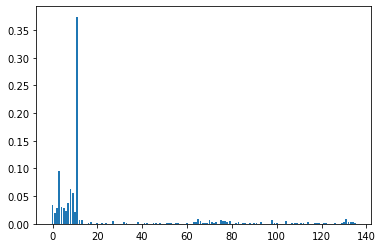

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_ch, y_ch, test_size = 0.20, random_state = 50)

from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2  
# 700 features with highest chi-squared statistics are selected 
chi2_features = SelectKBest(chi2,k=20)
X = chi2_features.fit_transform(features, target)
y = target

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=0)
model.fit(X_train, y_train)

# plot
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
plt.show()

In [ ]:
importance = pd.DataFrame(model.feature_importances_)
columns = pd.DataFrame(features.columns)
featureScores = pd.concat([columns,importance],axis=1)
featureScores.columns = ['Features','importance']
print(featureScores.nlargest(5,'importance')) 

     Features  importance
11     result    0.374005
3    A4_Score    0.094932
8    A9_Score    0.062243
9   A10_Score    0.056257
7    A8_Score    0.038324


### Adolescents' dataset

*Random-down sampling*

In [ ]:
shuffled_data = ad.sample(frac=1,random_state=4)
non_ASD_data = shuffled_data.loc[shuffled_data['Class/ASD'] == 'NO']
ASD_data = shuffled_data.loc[shuffled_data['Class/ASD'] == 'YES'].sample(n=41)
ad= pd.concat([ASD_data, non_ASD_data])

*Spliting dependent and independent features*

In [ ]:
# Split the data into features and target label
raw_target= ad['Class/ASD']
raw_features = ad[['A1_Score','A2_Score','A3_Score','A4_Score','A5_Score','A6_Score','A7_Score','A8_Score','A9_Score','A10_Score','Age_Mons','contry_of_res', 'gender', 'ethnicity', 'jundice', 'austim', 'contry_of_res', 'result','relation']]

*Feature Scaling*

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
num_features = ['Age_Mons', 'result']

features_minmax_transform = pd.DataFrame(data = raw_features)
features_minmax_transform[num_features] = scaler.fit_transform(raw_features[num_features])

In [ ]:
features_minmax_transform.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,Age_Mons,contry_of_res,gender,ethnicity,jundice,austim,contry_of_res,result,relation
95,1,1,1,0,1,1,1,1,1,1,0.75,Egypt,f,Middle Eastern,no,yes,Egypt,0.888889,Parent
25,1,0,1,1,1,1,0,1,1,1,0.00,United Kingdom,f,Others,no,no,United Kingdom,0.777778,Health care professional
64,1,0,1,1,1,0,1,1,1,0,0.50,United Kingdom,f,White-European,no,yes,United Kingdom,0.666667,Self
39,0,0,1,1,1,1,1,1,1,1,0.00,United States,m,White-European,no,no,United States,0.777778,Relative
17,1,0,1,1,1,1,0,1,1,1,0.00,United Kingdom,f,Others,no,no,United Kingdom,0.777778,Parent


*Encoding Categorical variables*

In [ ]:
features = pd.get_dummies(features_minmax_transform)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
target = le.fit_transform(raw_target)

*Function for Evaluation*

In [ ]:
def model_report(y_act, y_pred):
    from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, cohen_kappa_score, roc_curve,auc
    print("Accuracy = ", accuracy_score(y_act, y_pred))
    print("Precision = " ,precision_score(y_act, y_pred))
    print("Recall = " ,recall_score(y_act, y_pred))
    print("F1 Score = " ,f1_score(y_act, y_pred))
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_act, y_pred)
    print("AUC Score =", auc(false_positive_rate, true_positive_rate))
    print("Kappa score = ",cohen_kappa_score(y_act,y_pred))
    print("Error rate = " ,1 - accuracy_score(y_act, y_pred),"\n")
    pass



*Spliting Data*

In [ ]:
X_ad = features
y_ad = target

*Function for Models*

In [ ]:
def models(X,y):
    #Splitting the data into train test spit
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 50)

    #Importing Time for calculating the training and testing time
    import time
    start_time = time.time()
    
    #importing Gaussian Naive Bayes
    from sklearn.naive_bayes import GaussianNB
    gnb = GaussianNB()
    gnb.fit(X_train, y_train)
    
    # Predicting the Test set results
    y_pred = gnb.predict(X_test)
    
    #Getting the predicting probability
    predict_probab = gnb.predict_proba(X_test)
    
    #Geting the log_loss value of the model
    from sklearn.metrics import log_loss
    logloss = log_loss(y_test, predict_probab)
    end_time = time.time()
    eta = end_time - start_time
    
    #10-fold cross validation score
    from sklearn.model_selection import cross_val_score
    accuracy_gausian = cross_val_score(estimator = gnb, X = X_train, y = y_train, cv =10)
    gnb_mean = accuracy_gausian.mean()
    print("10 Fold Cross Validation Score Of Gaussian Naive Bayes:", gnb_mean)
    print('Time Elapsed:', eta)
    print('Log Loss:', logloss)
    
    #printing the output using the model report function
    model_report(y_test, y_pred)
    #
    #
    #
    start_time = time.time()
    #importing Multinomial Naive Bayes
    from sklearn.naive_bayes import MultinomialNB
    mnb = MultinomialNB()
    mnb.fit(X_train, y_train)
    
    #Getting the predicting probability
    predict_probab = mnb.predict_proba(X_test)
    
    #Geting the log_loss value of the model
    logloss = log_loss(y_test, predict_probab)
    
    # Predicting the Test set results
    y_pred = mnb.predict(X_test)
    end_time = time.time()
    eta = end_time - start_time
    
    #10-fold cross validation score
    accuracy_gausian = cross_val_score(estimator = mnb, X = X_train, y = y_train, cv =10)
    mnb_mean = accuracy_gausian.mean()
    print("10 Fold Cross Validation Score Of Multinomial Navie Bayes:", mnb_mean)
    print('Time Elapsed:', eta)
    print('log loss:', logloss)
    
    #printing the output using the model report function
    model_report(y_test, y_pred)
    #
    #
    #
    start_time = time.time()
    #importing Random Forest
    from sklearn.ensemble import RandomForestClassifier
    rf = RandomForestClassifier()
    rf.fit(X_train, y_train)
    # Predicting the Test set results
    y_pred = rf.predict(X_test)
    end_time = time.time()
    eta = end_time - start_time
    
    #10-fold cross validation score
    accuracy = cross_val_score(estimator = rf, X = X_train, y = y_train, cv =2)
    rf_cross = accuracy.mean()
    print("10-Fold Cross  Validation Score of Random Forest(Without Paramter Tuning):", rf_cross)
    print('Time Elapsed:', eta)

    #printing the output using the model report function
    model_report(y_test, y_pred)
    #
    #
    #
    start_time = time.time()
    #importing Random Forest
    from sklearn.ensemble import RandomForestClassifier
    rf = RandomForestClassifier(n_estimators = 800, min_samples_split = 5, min_samples_leaf = 1, max_features = 'sqrt', max_depth = 560, criterion = 'entropy')
    rf.fit(X_train, y_train)
    
    # Predicting the Test set results
    y_pred = rf.predict(X_test)
    end_time = time.time()
    eta = end_time - start_time
    
    #10-fold cross validation score
    from sklearn.model_selection import cross_val_score
    accuracy = cross_val_score(estimator = rf, X = X_train, y = y_train, cv =10)
    rf_cross = accuracy.mean()
    print("10-Fold Cross  Validation Score of Random Forest(With Paramter Tuning):", rf_cross)
    print('Time Elapsed:', eta)
    
    #printing the output using the model report function
    model_report(y_test, y_pred)
 
    #
    #
    #
    start_time = time.time()
    
    #importing support vector classifier
    from sklearn.svm import SVC

    svc = SVC()
    svc.fit(X_train,y_train)

    # Predicting the Test set results
    y_svc = svc.predict(X_test)
    end_time = time.time()
    eta = end_time - start_time
    
    #10-fold cross validation score
    from sklearn.model_selection import cross_val_score
    accuracy = cross_val_score(estimator = svc, X = X_train, y = y_train, cv =10)
    svc_mean = accuracy.mean()
    print("10 Fold Cross Validation Score Of Support Vector Classifier(Without parameter tuning):", svc_mean)
    print('Time Elapsed:', eta)

    #printing the output using the model report function
    model_report(y_test, y_svc)
    #
    #
    #
    start_time = time.time()
    
    #importing support vector classifier
    from sklearn.svm import SVC

    svc = SVC(kernel='poly',degree=2,C=1)
    svc.fit(X_train,y_train)

    # Predicting the Test set results
    y_svc = svc.predict(X_test)
    end_time = time.time()
    eta = end_time - start_time
    
    #10-fold cross validation score
    from sklearn.model_selection import cross_val_score
    accuracy = cross_val_score(estimator = svc, X = X_train, y = y_train, cv =10)
    svc_mean = accuracy.mean()
    print("10 Fold Cross Validation Score Of Support Vector Classifier(With parameter tuning):", svc_mean)
    print('Time Elapsed:', eta)

    #printing the output using the model report function
    model_report(y_test, y_svc)
    #
    #
    #
    start_time = time.time()
    
    #importing support vector classifier
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

    lda = LinearDiscriminantAnalysis()
    lda.fit(X_train,y_train)
    # Predicting the Test set results
    y_lda = svc.predict(X_test)
    end_time = time.time()
    eta = end_time - start_time
    
    #10-fold cross validation score
    from sklearn.model_selection import cross_val_score
    accuracy = cross_val_score(estimator = lda, X = X_train, y = y_train, cv =10)
    lda_mean = accuracy.mean()
    print("10 Fold Cross Validation Score Of Linear Discriminant Analysis:", lda_mean)
    print('Time Elapsed:', eta)

    #printing the output using the model report function
    model_report(y_test, y_lda)
    #
    #
    #
    start_time = time.time()
    from sklearn import neighbors

    knn = neighbors.KNeighborsClassifier()
    knn.fit(X_train,y_train)
    # Predicting the Test set results
    y_knn=knn.predict(X_test)
    end_time = time.time()
    eta = end_time - start_time
    
    #10-fold cross validation score
    from sklearn.model_selection import cross_val_score
    accuracy = cross_val_score(estimator = knn, X = X_train, y = y_train, cv =10)
    knn_mean = accuracy.mean()
    print("10 Fold Cross Validation Score Of K-Nearest Neighbour Algorithm(Without parameter tuning):", knn_mean)
    print('Time Elapsed:', eta)

    #printing the output using the model report function
    model_report(y_test, y_knn)
    #
    #
    #
    start_time = time.time()
    from sklearn import neighbors

    knn = neighbors.KNeighborsClassifier(weights='uniform', n_neighbors= 10, leaf_size=445, algorithm='brute')
    knn.fit(X_train,y_train)
    # Predicting the Test set results
    y_knn=knn.predict(X_test)
    end_time = time.time()
    eta = end_time - start_time
    
    #10-fold cross validation score
    from sklearn.model_selection import cross_val_score
    accuracy = cross_val_score(estimator = knn, X = X_train, y = y_train, cv =10)
    knn_mean = accuracy.mean()
    print("10 Fold Cross Validation Score Of K-Nearest Neighbour Algorithm(With parameter tuning):", knn_mean)
    print('Time Elapsed:', eta)

    #printing the output using the model report function
    model_report(y_test, y_knn)
  

In [ ]:
models(X_ad,y_ad) 

10 Fold Cross Validation Score Of Gaussian Naive Bayes: 0.7309523809523808
Time Elapsed: 0.006498575210571289
Log Loss: 16.253541832899145
Accuracy =  0.5294117647058824
Precision =  0.4666666666666667
Recall =  1.0
F1 Score =  0.6363636363636364
AUC Score = 0.6
Kappa score =  0.17073170731707332
Error rate =  0.47058823529411764 

10 Fold Cross Validation Score Of Multinomial Navie Bayes: 0.6547619047619047
Time Elapsed: 0.0055463314056396484
log loss: 1.2343632890037146
Accuracy =  0.5882352941176471
Precision =  0.5
Recall =  0.8571428571428571
F1 Score =  0.631578947368421
AUC Score = 0.6285714285714286
Kappa score =  0.23225806451612896
Error rate =  0.4117647058823529 

10-Fold Cross  Validation Score of Random Forest(Without Paramter Tuning): 0.984375
Time Elapsed: 0.15524077415466309
Accuracy =  1.0
Precision =  1.0
Recall =  1.0
F1 Score =  1.0
AUC Score = 1.0
Kappa score =  1.0
Error rate =  0.0 

10-Fold Cross  Validation Score of Random Forest(With Paramter Tuning): 1.0
Tim

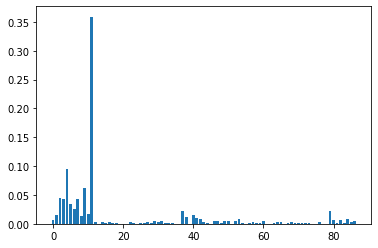

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_ad, y_ad, test_size = 0.20, random_state = 50)

from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2  
# 700 features with highest chi-squared statistics are selected 
chi2_features = SelectKBest(chi2,k=20)
X = chi2_features.fit_transform(features, target)
y = target

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=0)
model.fit(X_train, y_train)

# plot
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
plt.show()

In [ ]:
importance = pd.DataFrame(model.feature_importances_)
columns = pd.DataFrame(features.columns)
featureScores = pd.concat([columns,importance],axis=1)
featureScores.columns = ['Features','importance']
print(featureScores.nlargest(5,'importance')) 

     Features  importance
11     result    0.358966
4    A5_Score    0.095128
9   A10_Score    0.062554
2    A3_Score    0.043938
7    A8_Score    0.043324


### Adult's dataset

*Random-down sampling*

In [ ]:
shuffled_data = adu.sample(frac=1,random_state=4)
ASD_data = shuffled_data.loc[shuffled_data['Class/ASD'] == 'YES']
non_ASD_data = shuffled_data.loc[shuffled_data['Class/ASD'] == 'NO'].sample(n=189)
adu= pd.concat([ASD_data, non_ASD_data])

*Spliting dependent and independent features*

In [ ]:
# Split the data into features and target label
raw_target= adu['Class/ASD']
raw_features = adu[['A1_Score','A2_Score','A3_Score','A4_Score','A5_Score','A6_Score','A7_Score','A8_Score','A9_Score','A10_Score','Age_Mons', 'gender', 'ethnicity', 'jundice', 'austim', 'contry_of_res', 'result','relation']]

*Feature Scaling*


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
num_features = ['Age_Mons', 'result']

features_minmax_transform = pd.DataFrame(data = raw_features)
features_minmax_transform[num_features] = scaler.fit_transform(raw_features[num_features])

In [ ]:
features_minmax_transform.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,Age_Mons,gender,ethnicity,jundice,austim,contry_of_res,result,relation
146,1,0,1,1,1,1,1,1,1,1,0.068182,m,White-European,no,no,Australia,0.9,Self
169,1,1,1,1,1,0,0,1,1,1,0.431818,f,Latino,no,yes,Brazil,0.8,Self
641,1,0,1,1,1,0,1,1,1,0,0.272727,m,Latino,no,no,United States,0.7,Self
681,1,1,0,1,1,1,1,1,1,1,0.727273,f,Hispanic,no,no,United States,0.9,Self
696,1,1,1,1,1,1,0,1,1,1,0.318182,m,Turkish,no,yes,Australia,0.9,Self


*Encoding Categorical variables*

In [ ]:
features = pd.get_dummies(features_minmax_transform)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
target = le.fit_transform(raw_target)

*Function for Evaluation*

In [ ]:
def model_report(y_act, y_pred):
    from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, cohen_kappa_score, roc_curve,auc
    print("Accuracy = ", accuracy_score(y_act, y_pred))
    print("Precision = " ,precision_score(y_act, y_pred))
    print("Recall = " ,recall_score(y_act, y_pred))
    print("F1 Score = " ,f1_score(y_act, y_pred))
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_act, y_pred)
    print("AUC Score =", auc(false_positive_rate, true_positive_rate))
    print("Kappa score = ",cohen_kappa_score(y_act,y_pred))
    print("Error rate = " ,1 - accuracy_score(y_act, y_pred),"\n")
    pass


In [ ]:
def model_report(y_act, y_pred):
    from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, cohen_kappa_score, roc_curve,auc
    print(accuracy_score(y_act, y_pred))
    print(precision_score(y_act, y_pred))
    print(recall_score(y_act, y_pred))
    print(f1_score(y_act, y_pred))
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_act, y_pred)
    print(auc(false_positive_rate, true_positive_rate))
    print(cohen_kappa_score(y_act,y_pred))
    print("\n")
    pass

*Spliting Data*

In [ ]:
X_adu = features
y_adu = target

*Function for Models*

In [ ]:
def models(X,y):
    #Splitting the data into train test spit
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 50)

    #Importing Time for calculating the training and testing time
    import time
    start_time = time.time()
    
    #importing Gaussian Naive Bayes
    from sklearn.naive_bayes import GaussianNB
    gnb = GaussianNB()
    gnb.fit(X_train, y_train)
    
    # Predicting the Test set results
    y_pred = gnb.predict(X_test)
    
    #Getting the predicting probability
    predict_probab = gnb.predict_proba(X_test)
    
    #Geting the log_loss value of the model
    from sklearn.metrics import log_loss
    logloss = log_loss(y_test, predict_probab)
    end_time = time.time()
    eta = end_time - start_time
    
    #10-fold cross validation score
    from sklearn.model_selection import cross_val_score
    accuracy_gausian = cross_val_score(estimator = gnb, X = X_train, y = y_train, cv =10)
    gnb_mean = accuracy_gausian.mean()
    print("10 Fold Cross Validation Score Of Gaussian Naive Bayes:", gnb_mean)
    print('Time Elapsed:', eta)
    print('Log Loss:', logloss)
    
    #printing the output using the model report function
    model_report(y_test, y_pred)
    #
    #
    #
    start_time = time.time()
    #importing Multinomial Naive Bayes
    from sklearn.naive_bayes import MultinomialNB
    mnb = MultinomialNB()
    mnb.fit(X_train, y_train)
    
    #Getting the predicting probability
    predict_probab = mnb.predict_proba(X_test)
    
    #Geting the log_loss value of the model
    logloss = log_loss(y_test, predict_probab)
    
    # Predicting the Test set results
    y_pred = mnb.predict(X_test)
    end_time = time.time()
    eta = end_time - start_time
    
    #10-fold cross validation score
    accuracy_gausian = cross_val_score(estimator = mnb, X = X_train, y = y_train, cv =10)
    mnb_mean = accuracy_gausian.mean()
    print("10 Fold Cross Validation Score Of Multinomial Navie Bayes:", mnb_mean)
    print('Time Elapsed:', eta)
    print('log loss:', logloss)
    
    #printing the output using the model report function
    model_report(y_test, y_pred)
    #
    #
    #
    start_time = time.time()
    #importing Random Forest
    from sklearn.ensemble import RandomForestClassifier
    rf = RandomForestClassifier()
    rf.fit(X_train, y_train)
    # Predicting the Test set results
    y_pred = rf.predict(X_test)
    end_time = time.time()
    eta = end_time - start_time
    
    #10-fold cross validation score
    accuracy = cross_val_score(estimator = rf, X = X_train, y = y_train, cv =2)
    rf_cross = accuracy.mean()
    print("10-Fold Cross  Validation Score of Random Forest(Without Paramter Tuning):", rf_cross)
    print('Time Elapsed:', eta)

    #printing the output using the model report function
    model_report(y_test, y_pred)
    #
    #
    #
    start_time = time.time()
    #importing Random Forest
    from sklearn.ensemble import RandomForestClassifier
    rf = RandomForestClassifier(n_estimators = 800, min_samples_split = 5, min_samples_leaf = 1, max_features = 'sqrt', max_depth = 560, criterion = 'entropy')
    rf.fit(X_train, y_train)
    
    # Predicting the Test set results
    y_pred = rf.predict(X_test)
    end_time = time.time()
    eta = end_time - start_time
    
    #10-fold cross validation score
    from sklearn.model_selection import cross_val_score
    accuracy = cross_val_score(estimator = rf, X = X_train, y = y_train, cv =10)
    rf_cross = accuracy.mean()
    print("10-Fold Cross  Validation Score of Random Forest(With Paramter Tuning):", rf_cross)
    print('Time Elapsed:', eta)
    
    #printing the output using the model report function
    model_report(y_test, y_pred)
    #
    #
    #
    start_time = time.time()
    #importing XGBoost Classifier
    from xgboost import XGBClassifier
    
    #gup_hist is set for working with the GUP 
    xgb = XGBClassifier()
    xgb.fit(X_train, y_train)
    
    # Predicting the Test set results
    y_pred = xgb.predict(X_test)
    end_time = time.time()
    eta = end_time - start_time
    
    #10-fold cross validation score
    accuracy = cross_val_score(estimator = xgb, X = X_train, y = y_train, cv = 10)
    xgb_cross = accuracy.mean()
    print("10-Fold Cross  Validation Score of XGBOOST(Without aramter Tuning):", xgb_cross)
    print('Time Elapsed:', eta)
    
    #printing the output using the model report function
    model_report(y_test, y_pred)
    #
    #
    #
    start_time = time.time()
    
    #importing support vector classifier
    from sklearn.svm import SVC

    svc = SVC()
    svc.fit(X_train,y_train)

    # Predicting the Test set results
    y_svc = svc.predict(X_test)
    end_time = time.time()
    eta = end_time - start_time
    
    #10-fold cross validation score
    from sklearn.model_selection import cross_val_score
    accuracy = cross_val_score(estimator = svc, X = X_train, y = y_train, cv =10)
    svc_mean = accuracy.mean()
    print("10 Fold Cross Validation Score Of Support Vector Classifier(Without parameter tuning):", svc_mean)
    print('Time Elapsed:', eta)

    #printing the output using the model report function
    model_report(y_test, y_svc)
    #
    #
    #
    start_time = time.time()
    
    #importing support vector classifier
    from sklearn.svm import SVC

    svc = SVC(kernel='poly',degree=2,C=1)
    svc.fit(X_train,y_train)

    # Predicting the Test set results
    y_svc = svc.predict(X_test)
    end_time = time.time()
    eta = end_time - start_time
    
    #10-fold cross validation score
    from sklearn.model_selection import cross_val_score
    accuracy = cross_val_score(estimator = svc, X = X_train, y = y_train, cv =10)
    svc_mean = accuracy.mean()
    print("10 Fold Cross Validation Score Of Support Vector Classifier(With parameter tuning):", svc_mean)
    print('Time Elapsed:', eta)

    #printing the output using the model report function
    model_report(y_test, y_svc)
    #
    #
    #
    start_time = time.time()
    
    #importing support vector classifier
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

    lda = LinearDiscriminantAnalysis()
    lda.fit(X_train,y_train)
    # Predicting the Test set results
    y_lda = svc.predict(X_test)
    end_time = time.time()
    eta = end_time - start_time
    
    #10-fold cross validation score
    from sklearn.model_selection import cross_val_score
    accuracy = cross_val_score(estimator = lda, X = X_train, y = y_train, cv =10)
    lda_mean = accuracy.mean()
    print("10 Fold Cross Validation Score Of Linear Discriminant Analysis:", lda_mean)
    print('Time Elapsed:', eta)

    #printing the output using the model report function
    model_report(y_test, y_lda)
    #
    #
    #
    start_time = time.time()
    from sklearn import neighbors

    knn = neighbors.KNeighborsClassifier()
    knn.fit(X_train,y_train)
    # Predicting the Test set results
    y_knn=knn.predict(X_test)
    end_time = time.time()
    eta = end_time - start_time
    
    #10-fold cross validation score
    from sklearn.model_selection import cross_val_score
    accuracy = cross_val_score(estimator = knn, X = X_train, y = y_train, cv =10)
    knn_mean = accuracy.mean()
    print("10 Fold Cross Validation Score Of K-Nearest Neighbour Algorithm(Without parameter tuning):", knn_mean)
    print('Time Elapsed:', eta)

    #printing the output using the model report function
    model_report(y_test, y_knn)
    #
    #
    #
    start_time = time.time()
    from sklearn import neighbors

    knn = neighbors.KNeighborsClassifier(weights='uniform', n_neighbors= 10, leaf_size=445, algorithm='brute')
    knn.fit(X_train,y_train)
    # Predicting the Test set results
    y_knn=knn.predict(X_test)
    end_time = time.time()
    eta = end_time - start_time
    
    #10-fold cross validation score
    from sklearn.model_selection import cross_val_score
    accuracy = cross_val_score(estimator = knn, X = X_train, y = y_train, cv =10)
    knn_mean = accuracy.mean()
    print("10 Fold Cross Validation Score Of K-Nearest Neighbour Algorithm(With parameter tuning):", knn_mean)
    print('Time Elapsed:', eta)

    #printing the output using the model report function
    model_report(y_test, y_knn)
    #
    #
    #
    start_time = time.time()
    from sklearn.ensemble import AdaBoostClassifier

    model = AdaBoostClassifier(random_state=0)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    end_time = time.time()
    eta = end_time - start_time
    
    #10-fold cross validation score
    from sklearn.model_selection import cross_val_score
    accuracy = cross_val_score(estimator = model, X = X_train, y = y_train, cv =10)
    mean = accuracy.mean()
    print("10 Fold Cross Validation Score Of AdaBoost Classifier Algorithm(With parameter tuning):", mean)
    print('Time Elapsed:', eta)

    #printing the output using the model report function
    model_report(y_test, y_pred)

In [ ]:
models(X_adu,y_adu) 

10 Fold Cross Validation Score Of Gaussian Naive Bayes: 0.6788172043010752
Time Elapsed: 0.007319927215576172
Log Loss: 5.577818850811745
0.7368421052631579
0.7169811320754716
0.8837209302325582
0.7916666666666666
0.7145877378435517
0.4448502556610665


10 Fold Cross Validation Score Of Multinomial Navie Bayes: 0.8443010752688173
Time Elapsed: 0.003557920455932617
log loss: 0.26360411573906767
0.868421052631579
0.8666666666666667
0.9069767441860465
0.8863636363636364
0.8625792811839322
0.7303051809794181


10-Fold Cross  Validation Score of Random Forest(Without Paramter Tuning): 1.0
Time Elapsed: 0.16228461265563965
1.0
1.0
1.0
1.0
1.0
1.0


10-Fold Cross  Validation Score of Random Forest(With Paramter Tuning): 1.0
Time Elapsed: 1.2399797439575195
1.0
1.0
1.0
1.0
1.0
1.0


10-Fold Cross  Validation Score of XGBOOST(Without aramter Tuning): 1.0
Time Elapsed: 0.3466610908508301
1.0
1.0
1.0
1.0
1.0
1.0


10 Fold Cross Validation Score Of Support Vector Classifier(Without parameter tunin

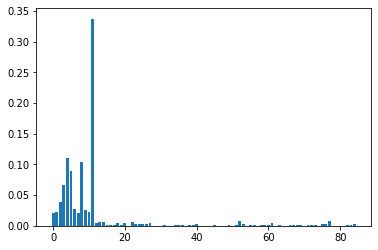

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_adu, y_adu, test_size = 0.20, random_state = 50)

from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2  
# 700 features with highest chi-squared statistics are selected 
chi2_features = SelectKBest(chi2,k=20)
X = chi2_features.fit_transform(features, target)
y = target

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=0)
model.fit(X_train, y_train)

# plot
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
plt.show()

In [ ]:
importance = pd.DataFrame(model.feature_importances_)
columns = pd.DataFrame(features.columns)
featureScores = pd.concat([columns,importance],axis=1)
featureScores.columns = ['Features','importance']
print(featureScores.nlargest(5,'importance')) 

    Features  importance
11    result    0.337643
4   A5_Score    0.110251
8   A9_Score    0.104201
5   A6_Score    0.089096
3   A4_Score    0.066343


### Combined dataset

#### Combining dataset

In [ ]:
#Adding a new field that represents the age group
td['Age_group'] = 'Toddler'
ch['Age_group'] = 'Children'
ad['Age_group'] = 'Adolescents'
adu['Age_group'] = 'Adults'

In [ ]:
#Combining the dataset of toddlers, children, adolescents and adults to a single dataset
frames = [ad,ch,adu,td]
final = pd.concat(frames)

In [ ]:
#imputing missing values
imputer_mode = SimpleImputer(missing_values=np.NaN, strategy='most_frequent')

final.contry_of_res = imputer_mode.fit_transform(final.contry_of_res.values.reshape(-1,1))[:,0]
final.used_app_before = imputer_mode.fit_transform(final.used_app_before.values.reshape(-1,1))[:,0]

In [ ]:
final.head()

,id,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,Age_Mons,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD,Age_group
95,96,1,1,1,0,1,1,1,1,1,1,180.0,f,Middle Eastern,no,yes,Egypt,no,9,Parent,YES,Adolescents
25,26,1,0,1,1,1,1,0,1,1,1,144.0,f,Others,no,no,United Kingdom,no,8,Health care professional,YES,Adolescents
64,65,1,0,1,1,1,0,1,1,1,0,168.0,f,White-European,no,yes,United Kingdom,no,7,Self,YES,Adolescents
39,40,0,0,1,1,1,1,1,1,1,1,144.0,m,White-European,no,no,United States,no,8,Relative,YES,Adolescents
17,18,1,0,1,1,1,1,0,1,1,1,144.0,f,Others,no,no,United Kingdom,no,8,Parent,YES,Adolescents


In [ ]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1806 entries, 95 to 99
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1806 non-null   int64  
 1   A1_Score         1806 non-null   int64  
 2   A2_Score         1806 non-null   int64  
 3   A3_Score         1806 non-null   int64  
 4   A4_Score         1806 non-null   int64  
 5   A5_Score         1806 non-null   int64  
 6   A6_Score         1806 non-null   int64  
 7   A7_Score         1806 non-null   int64  
 8   A8_Score         1806 non-null   int64  
 9   A9_Score         1806 non-null   int64  
 10  A10_Score        1806 non-null   int64  
 11  Age_Mons         1806 non-null   float64
 12  gender           1806 non-null   object 
 13  ethnicity        1806 non-null   object 
 14  jundice          1806 non-null   object 
 15  austim           1806 non-null   object 
 16  contry_of_res    1806 non-null   object 
 17  used_app_before

In [ ]:
final.describe()

,id,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,Age_Mons,result
count,1806.000000,1806.000000,1806.000000,1806.000000,1806.000000,1806.000000,1806.000000,1806.000000,1806.000000,1806.000000,1806.000000,1806.000000,1806.000000
mean,407.573090,0.629568,0.481728,0.502769,0.546512,0.586379,0.575305,0.604651,0.517719,0.500554,0.635659,111.266888,5.580842
std,300.091343,0.483054,0.499804,0.500131,0.497970,0.492619,0.494434,0.489061,0.499824,0.500138,0.481378,142.891574,2.775207
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000
25%,144.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,28.000000,3.000000
50%,340.500000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,36.000000,6.000000
75%,640.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,144.000000,8.000000
max,1054.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,732.000000,10.000000


In [ ]:
final.shape

(1806, 22)

In [ ]:
print("\nNo of individuals diagonised with ASD = ",len(final[final['Class/ASD'] == 'YES']))
print("No of individuals not diagonised with ASD = ",len(final[final['Class/ASD'] == 'NO']))


No of individuals diagonised with ASD =  1099
No of individuals not diagonised with ASD =  707


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



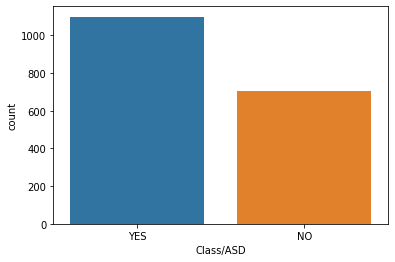

In [ ]:
sns.countplot(final['Class/ASD'])

#### **Spliting dependent and independent features**

In [ ]:
# Split the data into features and target label
raw_target= final['Class/ASD']
raw_features = final[['A1_Score','A2_Score','A3_Score','A4_Score','A5_Score','A6_Score','A7_Score','A8_Score','A9_Score','A10_Score','Age_Mons', 'gender', 'ethnicity', 'jundice', 'austim', 'contry_of_res', 'result','relation']]

#### **Feature Scaling**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
num_features = ['Age_Mons', 'result']

features_minmax_transform = pd.DataFrame(data = raw_features)
features_minmax_transform[num_features] = scaler.fit_transform(raw_features[num_features])

In [ ]:
features_minmax_transform.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,Age_Mons,gender,ethnicity,jundice,austim,contry_of_res,result,relation
95,1,1,1,0,1,1,1,1,1,1,0.233333,f,Middle Eastern,no,yes,Egypt,0.9,Parent
25,1,0,1,1,1,1,0,1,1,1,0.183333,f,Others,no,no,United Kingdom,0.8,Health care professional
64,1,0,1,1,1,0,1,1,1,0,0.216667,f,White-European,no,yes,United Kingdom,0.7,Self
39,0,0,1,1,1,1,1,1,1,1,0.183333,m,White-European,no,no,United States,0.8,Relative
17,1,0,1,1,1,1,0,1,1,1,0.183333,f,Others,no,no,United Kingdom,0.8,Parent


#### **Encoding Categorical variables**

In [ ]:
features = pd.get_dummies(features_minmax_transform)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
target = le.fit_transform(raw_target)

#### **Function for Evaluation**

In [ ]:
def model_report(y_act, y_pred):
    from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, cohen_kappa_score, roc_curve,auc
    print("Accuracy = ", accuracy_score(y_act, y_pred))
    print("Precision = " ,precision_score(y_act, y_pred))
    print("Recall = " ,recall_score(y_act, y_pred))
    print("F1 Score = " ,f1_score(y_act, y_pred))
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_act, y_pred)
    print("AUC Score =", auc(false_positive_rate, true_positive_rate))
    print("Kappa score = ",cohen_kappa_score(y_act,y_pred))
    print("Error rate = " ,1 - accuracy_score(y_act, y_pred),"\n")
    pass

#### **Spliting Data**

In [ ]:
X = features
y = target

#### **Feature Selection**

chi-square feature selection

In [ ]:
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2  
chi2_features = SelectKBest(chi2,k=75)
fit= chi2_features.fit(X,y)
scores = pd.DataFrame(fit.scores_)
columns = pd.DataFrame(features.columns)
featureScores = pd.concat([columns,scores],axis=1)
featureScores.columns = ['Features','Score']
print(featureScores.nlargest(50,'Score')) 

                               Features       Score
8                              A9_Score  276.212411
5                              A6_Score  209.547582
3                              A4_Score  200.981123
4                              A5_Score  196.360790
6                              A7_Score  159.175031
11                               result  144.965157
1                              A2_Score  122.875034
7                              A8_Score  117.864295
2                              A3_Score  114.619495
0                              A1_Score  103.094381
107  contry_of_res_United Arab Emirates   41.683105
9                             A10_Score   39.862798
109         contry_of_res_United States   38.626497
67                  contry_of_res_India   35.271878
75                 contry_of_res_Jordan   28.719841
18            ethnicity_Middle Eastern    26.569134
115                   relation_Relative   23.990541
116                       relation_Self   22.259507
114         

In [ ]:

from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2  
# 700 features with highest chi-squared statistics are selected 
chi2_features = SelectKBest(chi2,k=75)
X = chi2_features.fit_transform(X,y)
y = target

#### **Function for Models**

In [ ]:
def models(X,y):
    #Splitting the data into train test spit
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 50)

    #Importing Time for calculating the training and testing time
    import time
    start_time = time.time()
    
    #importing Gaussian Naive Bayes
    from sklearn.naive_bayes import GaussianNB
    gnb = GaussianNB()
    gnb.fit(X_train, y_train)
    
    # Predicting the Test set results
    y_pred = gnb.predict(X_test)
    
    #Getting the predicting probability
    predict_probab = gnb.predict_proba(X_test)
    
    #Geting the log_loss value of the model
    from sklearn.metrics import log_loss
    logloss = log_loss(y_test, predict_probab)
    end_time = time.time()
    eta = end_time - start_time
    
    #10-fold cross validation score
    from sklearn.model_selection import cross_val_score
    accuracy_gausian = cross_val_score(estimator = gnb, X = X_train, y = y_train, cv =10)
    gnb_mean = accuracy_gausian.mean()
    print("10 Fold Cross Validation Score Of Gaussian Naive Bayes:", gnb_mean)
    print('Time Elapsed:', eta)
    print('Log Loss:', logloss)
    
    #printing the output using the model report function
    model_report(y_test, y_pred)
    #
    #
    #
    start_time = time.time()
    #importing Multinomial Naive Bayes
    from sklearn.naive_bayes import MultinomialNB
    mnb = MultinomialNB()
    mnb.fit(X_train, y_train)
    
    #Getting the predicting probability
    predict_probab = mnb.predict_proba(X_test)
    
    #Geting the log_loss value of the model
    logloss = log_loss(y_test, predict_probab)
    
    # Predicting the Test set results
    y_pred = mnb.predict(X_test)
    end_time = time.time()
    eta = end_time - start_time
    
    #10-fold cross validation score
    accuracy_gausian = cross_val_score(estimator = mnb, X = X_train, y = y_train, cv =10)
    mnb_mean = accuracy_gausian.mean()
    print("10 Fold Cross Validation Score Of Multinomial Navie Bayes:", mnb_mean)
    print('Time Elapsed:', eta)
    print('log loss:', logloss)
    
    #printing the output using the model report function
    model_report(y_test, y_pred)
    #
    #
    #
    start_time = time.time()
    #importing Random Forest
    from sklearn.ensemble import RandomForestClassifier
    rf = RandomForestClassifier()
    rf.fit(X_train, y_train)
    # Predicting the Test set results
    y_pred = rf.predict(X_test)
    end_time = time.time()
    eta = end_time - start_time
    
    #10-fold cross validation score
    accuracy = cross_val_score(estimator = rf, X = X_train, y = y_train, cv =2)
    rf_cross = accuracy.mean()
    print("10-Fold Cross  Validation Score of Random Forest(Without Paramter Tuning):", rf_cross)
    print('Time Elapsed:', eta)

    #printing the output using the model report function
    model_report(y_test, y_pred)
    #
    #
    #
    start_time = time.time()
    #importing Random Forest
    from sklearn.ensemble import RandomForestClassifier
    rf = RandomForestClassifier(n_estimators = 800, min_samples_split = 5, min_samples_leaf = 1, max_features = 'sqrt', max_depth = 560, criterion = 'entropy')
    rf.fit(X_train, y_train)
    
    # Predicting the Test set results
    y_pred = rf.predict(X_test)
    end_time = time.time()
    eta = end_time - start_time
    
    #10-fold cross validation score
    from sklearn.model_selection import cross_val_score
    accuracy = cross_val_score(estimator = rf, X = X_train, y = y_train, cv =10)
    rf_cross = accuracy.mean()
    print("10-Fold Cross  Validation Score of Random Forest(With Paramter Tuning):", rf_cross)
    print('Time Elapsed:', eta)
    
    #printing the output using the model report function
    model_report(y_test, y_pred)
    #
    #
    #
    start_time = time.time()
    #importing XGBoost Classifier
    from xgboost import XGBClassifier
    
    #gup_hist is set for working with the GUP 
    xgb = XGBClassifier()
    xgb.fit(X_train, y_train)
    
    # Predicting the Test set results
    y_pred = xgb.predict(X_test)
    end_time = time.time()
    eta = end_time - start_time
    
    #10-fold cross validation score
    accuracy = cross_val_score(estimator = xgb, X = X_train, y = y_train, cv = 10)
    xgb_cross = accuracy.mean()
    print("10-Fold Cross  Validation Score of XGBOOST(Without aramter Tuning):", xgb_cross)
    print('Time Elapsed:', eta)
    
    #printing the output using the model report function
    model_report(y_test, y_pred)
    #
    #
    #
    start_time = time.time()
    
    #importing support vector classifier
    from sklearn.svm import SVC

    svc = SVC()
    svc.fit(X_train,y_train)

    # Predicting the Test set results
    y_svc = svc.predict(X_test)
    end_time = time.time()
    eta = end_time - start_time
    
    #10-fold cross validation score
    from sklearn.model_selection import cross_val_score
    accuracy = cross_val_score(estimator = svc, X = X_train, y = y_train, cv =10)
    svc_mean = accuracy.mean()
    print("10 Fold Cross Validation Score Of Support Vector Classifier(Without parameter tuning):", svc_mean)
    print('Time Elapsed:', eta)

    #printing the output using the model report function
    model_report(y_test, y_svc)
    #
    #
    #
    start_time = time.time()
    
    #importing support vector classifier
    from sklearn.svm import SVC

    svc = SVC(kernel='poly',degree=2,C=1)
    svc.fit(X_train,y_train)

    # Predicting the Test set results
    y_svc = svc.predict(X_test)
    end_time = time.time()
    eta = end_time - start_time
    
    #10-fold cross validation score
    from sklearn.model_selection import cross_val_score
    accuracy = cross_val_score(estimator = svc, X = X_train, y = y_train, cv =10)
    svc_mean = accuracy.mean()
    print("10 Fold Cross Validation Score Of Support Vector Classifier(With parameter tuning):", svc_mean)
    print('Time Elapsed:', eta)

    #printing the output using the model report function
    model_report(y_test, y_svc)
    #
    #
    #
    start_time = time.time()
    
    #importing support vector classifier
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

    lda = LinearDiscriminantAnalysis()
    lda.fit(X_train,y_train)
    # Predicting the Test set results
    y_lda = svc.predict(X_test)
    end_time = time.time()
    eta = end_time - start_time
    
    #10-fold cross validation score
    from sklearn.model_selection import cross_val_score
    accuracy = cross_val_score(estimator = lda, X = X_train, y = y_train, cv =10)
    lda_mean = accuracy.mean()
    print("10 Fold Cross Validation Score Of Linear Discriminant Analysis:", lda_mean)
    print('Time Elapsed:', eta)

    #printing the output using the model report function
    model_report(y_test, y_lda)
    #
    #
    #
    start_time = time.time()
    from sklearn import neighbors

    knn = neighbors.KNeighborsClassifier()
    knn.fit(X_train,y_train)
    # Predicting the Test set results
    y_knn=knn.predict(X_test)
    end_time = time.time()
    eta = end_time - start_time
    
    #10-fold cross validation score
    from sklearn.model_selection import cross_val_score
    accuracy = cross_val_score(estimator = knn, X = X_train, y = y_train, cv =10)
    knn_mean = accuracy.mean()
    print("10 Fold Cross Validation Score Of K-Nearest Neighbour Algorithm(Without parameter tuning):", knn_mean)
    print('Time Elapsed:', eta)

    #printing the output using the model report function
    model_report(y_test, y_knn)
    #
    #
    #
    start_time = time.time()
    from sklearn import neighbors

    knn = neighbors.KNeighborsClassifier(weights='uniform', n_neighbors= 10, leaf_size=445, algorithm='brute')
    knn.fit(X_train,y_train)
    # Predicting the Test set results
    y_knn=knn.predict(X_test)
    end_time = time.time()
    eta = end_time - start_time
    
    #10-fold cross validation score
    from sklearn.model_selection import cross_val_score
    accuracy = cross_val_score(estimator = knn, X = X_train, y = y_train, cv =10)
    knn_mean = accuracy.mean()
    print("10 Fold Cross Validation Score Of K-Nearest Neighbour Algorithm(With parameter tuning):", knn_mean)
    print('Time Elapsed:', eta)

    #printing the output using the model report function
    model_report(y_test, y_knn)
    #
    #
    #
    start_time = time.time()
    from sklearn.ensemble import AdaBoostClassifier

    model = AdaBoostClassifier(random_state=0)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    end_time = time.time()
    eta = end_time - start_time
    
    #10-fold cross validation score
    from sklearn.model_selection import cross_val_score
    accuracy = cross_val_score(estimator = model, X = X_train, y = y_train, cv =10)
    mean = accuracy.mean()
    print("10 Fold Cross Validation Score Of AdaBoost Classifier Algorithm(With parameter tuning):", mean)
    print('Time Elapsed:', eta)

    #printing the output using the model report function
    model_report(y_test, y_pred)

In [ ]:
models(X,y) 

10 Fold Cross Validation Score Of Gaussian Naive Bayes: 0.6378304597701149
Time Elapsed: 0.0069980621337890625
Log Loss: 12.214641717270595
Accuracy =  0.643646408839779
Precision =  0.6368876080691642
Recall =  0.9866071428571429
F1 Score =  0.7740805604203153
AUC Score = 0.5367818322981367
Kappa score =  0.0887483901182533
Error rate =  0.35635359116022103 

10 Fold Cross Validation Score Of Multinomial Navie Bayes: 0.8525431034482759
Time Elapsed: 0.003987789154052734
log loss: 0.2905835995939656
Accuracy =  0.9005524861878453
Precision =  0.8821138211382114
Recall =  0.96875
F1 Score =  0.9234042553191489
AUC Score = 0.879302536231884
Kappa score =  0.782553560702129
Error rate =  0.09944751381215466 

10-Fold Cross  Validation Score of Random Forest(Without Paramter Tuning): 0.9965373961218837
Time Elapsed: 0.21296215057373047
Accuracy =  0.994475138121547
Precision =  0.9911504424778761
Recall =  1.0
F1 Score =  0.9955555555555555
AUC Score = 0.9927536231884059
Kappa score =  0.9

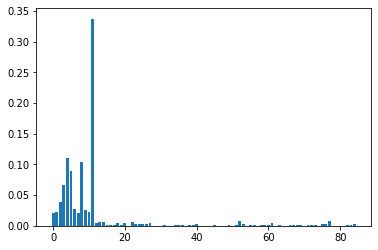

In [ ]:
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2  
# 700 features with highest chi-squared statistics are selected 
chi2_features = SelectKBest(chi2,k=20)
X = chi2_features.fit_transform(features, target)
y = target

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=0)
model.fit(X_train, y_train)
# plot
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
plt.show()


In [ ]:
importance = pd.DataFrame(model.feature_importances_)
columns = pd.DataFrame(features.columns)
featureScores = pd.concat([columns,importance],axis=1)
featureScores.columns = ['Features','importance']
print(featureScores.nlargest(5,'importance')) 

    Features  importance
11    result    0.337643
4   A5_Score    0.110251
8   A9_Score    0.104201
5   A6_Score    0.089096
3   A4_Score    0.066343



### **Hyper parameter tuning**

#### **K-Nearest Neighbour**

RandomizedSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

n_neighbors = [int(x) for x in np.linspace(1,1000,10)]
weights = ['uniform','distance']
algorithm =['auto', 'ball_tree', 'kd_tree', 'brute']
leaf_size = [int(x) for x in np.linspace(1,1000,10)]

random_grid = {'n_neighbors':n_neighbors,
               'weights':weights,
               'algorithm':algorithm,
               'leaf_size':leaf_size}
print(random_grid)

{'n_neighbors': [1, 112, 223, 334, 445, 556, 667, 778, 889, 1000], 'weights': ['uniform', 'distance'], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 'leaf_size': [1, 112, 223, 334, 445, 556, 667, 778, 889, 1000]}


In [ ]:
#Spliting training and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 50)

Initializing the Random Search CV for Hyper-Parameter Tuning

In [ ]:
from sklearn import neighbors

knn = neighbors.KNeighborsClassifier()
knn_randomcv=RandomizedSearchCV(estimator= knn,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
#fit the randomized model
knn_randomcv.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 278 tasks      | elapsed:   17.5s
[Parallel(n_jobs=-1)]: Done 297 out of 300 | elapsed:   18.6s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   18.7s finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=KNeighborsClassifier(algorithm='auto',
                                                  leaf_size=30,
                                                  metric='minkowski',
                                                  metric_params=None,
                                                  n_jobs=None, n_neighbors=5,
                                                  p=2, weights='uniform'),
                   iid='deprecated', n_iter=100, n_jobs=-1,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'leaf_size': [1, 112, 223, 334, 445,
                                                      556, 667, 778, 889,
                                                      1000],
                                        'n_neighbors': [1, 112, 223, 334, 445,
                                

Printing the results optained by Random Search Function


In [ ]:
print('\n All results:')
print(knn_randomcv.cv_results_)


 All results:
{'mean_fit_time': array([0.00229534, 0.0046618 , 0.00116857, 0.00157738, 0.00262101,
       0.00080784, 0.00304119, 0.00472331, 0.00236066, 0.00153796,
       0.00158119, 0.00159629, 0.00156418, 0.0016245 , 0.00078241,
       0.00232331, 0.00155878, 0.00179164, 0.00099548, 0.00173116,
       0.00106486, 0.00221205, 0.00073791, 0.00204659, 0.00193183,
       0.00107002, 0.0018123 , 0.000712  , 0.00110428, 0.00070397,
       0.00163031, 0.00263397, 0.0011069 , 0.00436592, 0.00172639,
       0.00306996, 0.00160472, 0.00082612, 0.00091815, 0.00107233,
       0.00453401, 0.001038  , 0.00097855, 0.00079489, 0.0008208 ,
       0.00108949, 0.00156411, 0.00076429, 0.00078233, 0.00078972,
       0.00077518, 0.00203228, 0.00096695, 0.00109402, 0.001086  ,
       0.00160448, 0.00235184, 0.00077987, 0.00080736, 0.00094493,
       0.00193326, 0.0018084 , 0.00175174, 0.00234087, 0.00168188,
       0.00662438, 0.00369763, 0.00157412, 0.00441019, 0.00112979,
       0.00483672, 0.00099707

In [ ]:
print('\n Best estimator:')
print(knn_randomcv.best_estimator_)


 Best estimator:
KNeighborsClassifier(algorithm='brute', leaf_size=445, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')


In [ ]:
print('\n Best hyperparameters:')
print(knn_randomcv.best_params_)


 Best hyperparameters:
{'weights': 'uniform', 'n_neighbors': 1, 'leaf_size': 445, 'algorithm': 'brute'}


Trying out the optained Hyper-paramters before using in the function

In [ ]:
from sklearn import neighbors

knn = neighbors.KNeighborsClassifier(weights='uniform', n_neighbors= 1, leaf_size=445, algorithm='brute')
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='brute', leaf_size=445, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [ ]:
y_pred = knn.predict(X_test)
model_report(y_test, y_pred)

Accuracy =  0.9396751740139211
Precision =  0.9203539823008849
Recall =  0.9629629629629629
F1 Score =  0.9411764705882353
AUC Score = 0.9396210163652023
Kappa score =  0.8793367072251534
Error rate =  0.06032482598607891 



#### **Support Vector Machines**

RandomizedSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

C = [int(x) for x in np.linspace(start = 1, stop = 20, num = 10)]
kernel = ['linear', 'poly', 'rbf', 'sigmoid']
degree = [int(x) for x in np.linspace(start = 1, stop = 10, num = 10)]

random_grid = {'C':C,
               'kernel':kernel,
               'degree':degree}
print(random_grid)

{'C': [1, 3, 5, 7, 9, 11, 13, 15, 17, 20], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'degree': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}


In [ ]:
#Spliting training and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 50)

Initializing the Random Search CV for Hyper-Parameter Tuning

In [ ]:
from sklearn.svm import SVC
svc = SVC()
svc_randomcv=RandomizedSearchCV(estimator= svc,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
#fit the randomized model
svc_randomcv.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    7.1s finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                 class_weight=None, coef0=0.0,
                                 decision_function_shape='ovr', degree=3,
                                 gamma='scale', kernel='rbf', max_iter=-1,
                                 probability=False, random_state=None,
                                 shrinking=True, tol=0.001, verbose=False),
                   iid='deprecated', n_iter=100, n_jobs=-1,
                   param_distributions={'C': [1, 3, 5, 7, 9, 11, 13, 15, 17,
                                              20],
                                        'degree': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid']},
                   pre_dispatch='2*n_jobs', random_state=100, r

Printing the results optained by Random Search Function


In [ ]:
print('\n All results:')
print(svc_randomcv.cv_results_)


 All results:
{'mean_fit_time': array([0.01936777, 0.03315012, 0.02180974, 0.02903835, 0.01666292,
       0.0789152 , 0.01502625, 0.03078771, 0.07907049, 0.02548186,
       0.02273862, 0.01841092, 0.03003184, 0.0713888 , 0.03112133,
       0.02995324, 0.01699662, 0.07486057, 0.01309061, 0.07181247,
       0.03156726, 0.02218755, 0.0273428 , 0.01498071, 0.01936483,
       0.02092274, 0.06991331, 0.07275399, 0.01211945, 0.0702134 ,
       0.02793956, 0.02850445, 0.02764877, 0.01314259, 0.01871729,
       0.0704236 , 0.07109499, 0.06885767, 0.02084374, 0.02759035,
       0.0157671 , 0.02621953, 0.06898014, 0.02214599, 0.03353437,
       0.01192443, 0.01599725, 0.03082355, 0.01932343, 0.03100363,
       0.01880074, 0.07341258, 0.01874876, 0.01758973, 0.01952569,
       0.02851391, 0.06931329, 0.01791358, 0.01794124, 0.01853228,
       0.01769249, 0.02504293, 0.07025154, 0.03811288, 0.02990429,
       0.02025565, 0.06877653, 0.01725761, 0.02879802, 0.02868859,
       0.06938585, 0.01963941

In [ ]:
print('\n Best estimator:')
print(svc_randomcv.best_estimator_)


 Best estimator:
SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [ ]:
print('\n Best hyperparameters:')
print(svc_randomcv.best_params_)


 Best hyperparameters:
{'kernel': 'poly', 'degree': 2, 'C': 1}


Trying out the optained Hyper-paramters before using in the function

In [ ]:
svc = SVC(kernel='poly',degree=2,C=1)
svc.fit(X_train,y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred = svc.predict(X_test)
model_report(y_test, y_pred)

Accuracy =  0.988399071925754
Precision =  0.9861751152073732
Recall =  0.9907407407407407
F1 Score =  0.9884526558891454
AUC Score = 0.9883936261843239
Kappa score =  0.9767977691404947
Error rate =  0.011600928074245953 



#### **Random Forest Classifier**

RandomizedSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV


# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
#criterion used in trees
criterion = ['entropy','gini']

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':criterion}
              
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [ ]:
#Spliting training and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 50)

Initializing the Random Search CV for Hyper-Parameter Tuning

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
#fit the randomized model
rf_randomcv.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   57.0s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  7.7min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

Printing the results optained by Random Search Function

In [ ]:
print('\n All results:')
print(rf_randomcv.cv_results_)


 All results:
{'mean_fit_time': array([0.52962557, 3.47710983, 4.97951492, 5.00975092, 0.48792934,
       1.50401537, 4.96555948, 3.43355989, 3.56925623, 1.56331221,
       1.46038763, 3.51132671, 1.00123556, 1.48860176, 1.01692192,
       0.49841054, 4.40571411, 1.4850773 , 1.94026923, 4.92877134,
       0.49732995, 2.46909293, 3.9298718 , 0.50606426, 3.01372878,
       2.0093778 , 2.03364317, 1.00451589, 2.02904852, 0.49007972,
       2.03110854, 2.01091615, 0.99462851, 2.9544402 , 4.87123346,
       3.94629733, 3.97949775, 4.07989327, 5.08145046, 4.64708002,
       1.56033643, 5.0095466 , 1.9905146 , 3.49287891, 5.01467252,
       1.97018107, 2.0295101 , 3.55087193, 4.40525548, 1.4883639 ,
       3.88766575, 4.91795413, 3.60258047, 1.52050519, 3.45289882,
       0.50508261, 3.48168087, 2.47893127, 1.96879276, 4.48089806,
       4.92088739, 0.98323274, 0.49534893, 5.04068351, 0.99101226,
       1.50390617, 4.53438481, 5.12484256, 1.98284666, 5.01840846,
       3.01039537, 1.56306044

In [ ]:
print('\n Best estimator:')
print(rf_randomcv.best_estimator_)


 Best estimator:
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=340, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=14,
                       min_weight_fraction_leaf=0.0, n_estimators=2000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [ ]:
print('\n Best hyperparameters:')
print(rf_randomcv.best_params_)


 Best hyperparameters:
{'n_estimators': 2000, 'min_samples_split': 14, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 340, 'criterion': 'gini'}


Trying out the optained Hyper-paramters before using in the function

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 800, min_samples_split = 5, min_samples_leaf = 1, max_features = 'sqrt', max_depth = 560, criterion = 'entropy')
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=560, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=800,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred = rf.predict(X_test)

In [ ]:
model_report(y_test, y_pred)

Accuracy =  0.9976798143851509
Precision =  0.9953917050691244
Recall =  1.0
F1 Score =  0.997690531177829
AUC Score = 0.9976744186046512
Kappa score =  0.9953595538280989
Error rate =  0.002320185614849146 

